In [21]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [22]:
# Load the data
df = pd.read_csv('participant_gesture_dataset.csv')


In [23]:
# Convert landmark strings to lists
df['landmarks'] = df['landmarks'].apply(ast.literal_eval)

# Convert to NumPy arrays for easier handling
df['landmarks'] = df['landmarks'].apply(np.array)

# Extract only arm landmarks (indices 11 to 16 — left/right shoulders, elbows, wrists)
arm_indices = [11, 12, 13, 14, 15, 16]

def extract_arm_landmarks(landmarks):
    # landmarks is a (33, 3) array if using MediaPipe Pose with 33 keypoints
    return landmarks[arm_indices].flatten()

# Apply extraction
df['arm_landmarks'] = df['landmarks'].apply(extract_arm_landmarks)

In [24]:
def plot_landmarks(landmark_vector, img_size=200):
    """
    Visualize arm landmarks as a schematic image
    landmark_vector: 18-dim array (6 points × 3 coordinates)
    img_size: Output image size in pixels
    """
    # Reshape to 6 points with (x,y,z)
    points = landmark_vector.reshape(-1, 3)

    # Extract x,y coordinates (ignore z for 2D visualization)
    xs = points[:, 0]
    ys = 1 - points[:, 1]  # Flip Y-axis for more natural display

    # Create figure
    fig, ax = plt.subplots(figsize=(5, 5))

    # Plot connections (MediaPipe arm connections)
    connections = [
        (0, 2),  # Left shoulder to left elbow
        (2, 4),  # Left elbow to left wrist
        (1, 3),  # Right shoulder to right elbow
        (3, 5)   # Right elbow to right wrist
    ]

    # Draw connections
    for start, end in connections:
        ax.plot([xs[start], xs[end]], [ys[start], ys[end]],
                linewidth=2, color='red')

    # Plot landmarks
    ax.scatter(xs, ys, s=100, c='blue', marker='o')

    # Configure plot
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.title("Arm Landmarks Schematic")
    plt.show()

[ 0.63509816  0.66757905 -0.16376418  0.44358087  0.67850804 -0.30946037
  0.76660407  0.71176136 -0.05007144  0.39909896  0.90024656 -0.45346132
  0.91798544  0.93283826 -0.11834012  0.38370508  1.04964209 -0.73593557]
1
left


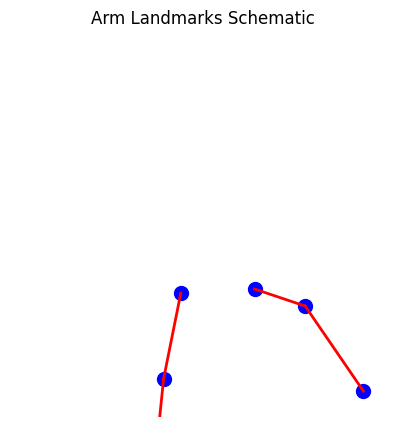

[ 0.63518989  0.66984785 -0.16014293  0.44170776  0.65111417 -0.0427594
  0.67568874  0.87136799 -0.12276559  0.32166585  0.72713506  0.01578189
  0.70215428  1.05467486 -0.29500613  0.17560579  0.70080286 -0.10141585]
1
stop


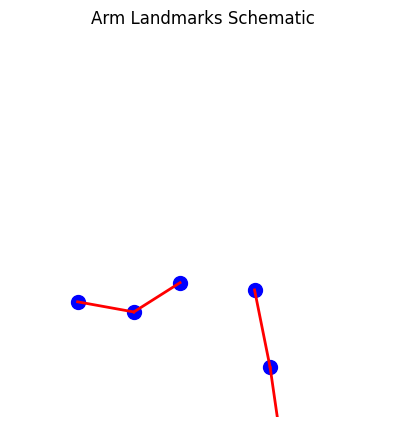

[ 0.63449895  0.67738682 -0.15605584  0.43768731  0.64712906 -0.01642098
  0.66900653  0.89358848 -0.15373757  0.30354279  0.70435983  0.01534247
  0.69029856  1.06771398 -0.3392421   0.15171328  0.69311517 -0.13672021]
1
stop


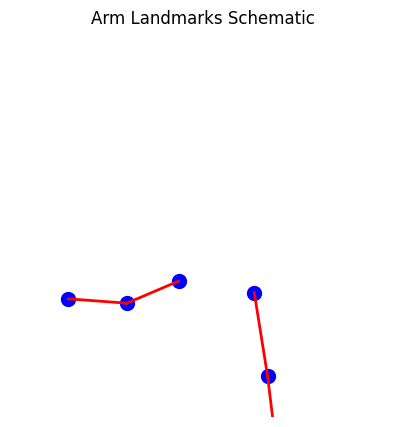

[ 0.50199449  0.64843613 -0.06126235  0.36079544  0.65005398 -0.02450292
  0.58972847  0.67447597 -0.12957902  0.30538002  0.81467074  0.00829383
  0.68641722  0.69363767 -0.42115045  0.33800793  0.90618134 -0.12307398]
1
stop


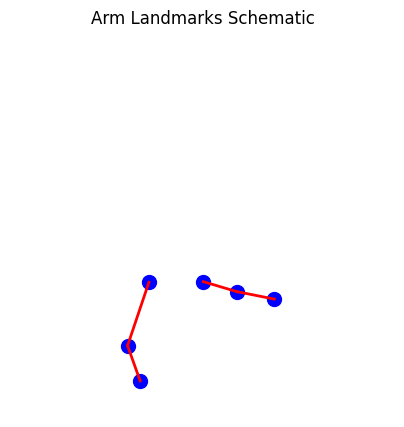

[ 0.53738803  0.65246165 -0.13349043  0.38613757  0.63183248 -0.02461355
  0.57312089  0.76657349 -0.16179071  0.30583948  0.64533013 -0.14951447
  0.55886376  0.9323408  -0.34894943  0.25007516  0.60939485 -0.53620332]
1
right


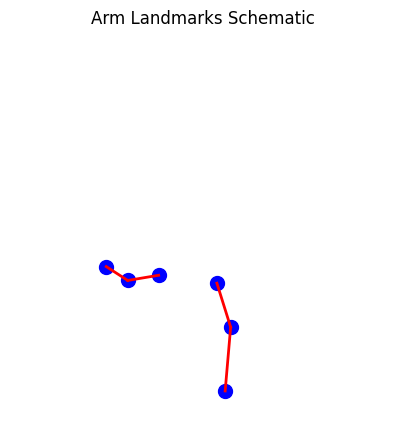

[ 0.53246093  0.65403378 -0.09987404  0.39769229  0.6544379  -0.00091526
  0.59957308  0.752437   -0.22366846  0.31247228  0.74680775  0.04265292
  0.69003004  0.68509823 -0.56010431  0.23403785  0.74730277 -0.09023665]
1
stop


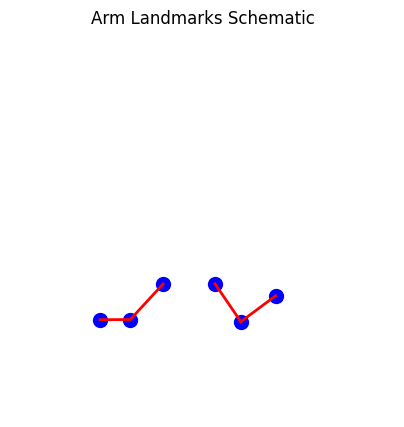

[ 0.53517884  0.67757297 -0.15537295  0.39321369  0.66293472 -0.05760609
  0.56299436  0.82845914 -0.15674907  0.31345165  0.70438218 -0.07727692
  0.552903    0.94797188 -0.34441954  0.21297197  0.70522392 -0.38015613]
1
right


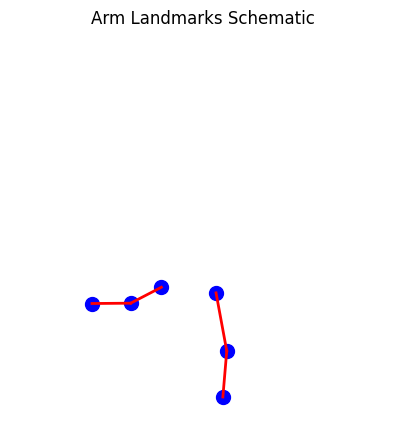

[ 0.53240466  0.68118107 -0.15323928  0.39720133  0.65084279 -0.00220886
  0.5664928   0.83147812 -0.17187944  0.30644888  0.6532113  -0.02428623
  0.55011904  0.94712758 -0.35655835  0.20784076  0.62594289 -0.31556612]
1
right


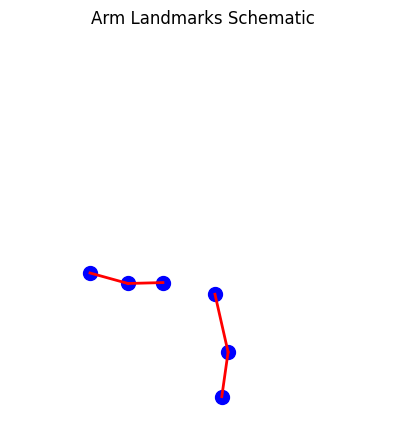

[ 0.52199191  0.6648711  -0.09340872  0.38263884  0.67434013 -0.17151986
  0.59294355  0.69465989  0.02136309  0.36012873  0.83507729 -0.12494332
  0.70053089  0.67723119 -0.03436028  0.3682335   0.95311588 -0.0420757 ]
1
left


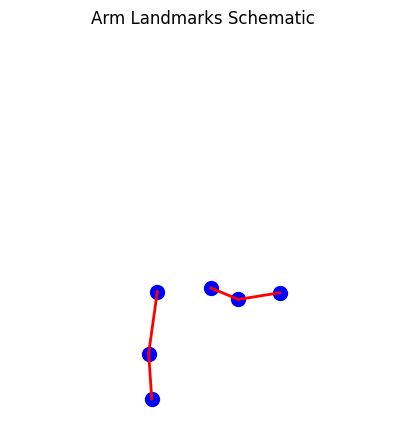

[ 0.49273831  0.60908037 -0.04114698  0.3836807   0.58535516 -0.01771445
  0.51247573  0.71729016 -0.00710006  0.31124213  0.61014873 -0.18314984
  0.52991658  0.81201607 -0.09943993  0.2687887   0.531286   -0.51141322]
2
right


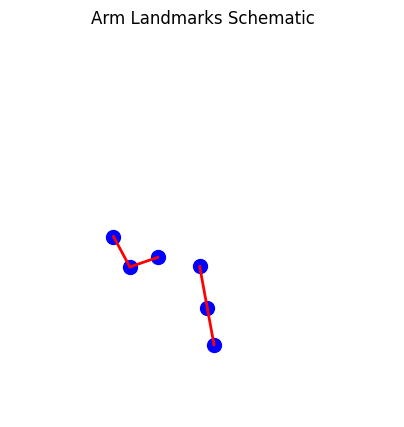

[ 0.62040788  0.61992264 -0.04299914  0.50573987  0.61700797 -0.03700202
  0.64275396  0.73404419  0.03331099  0.48102313  0.73601848  0.01326844
  0.66693276  0.83172047 -0.09893981  0.47089553  0.85100675 -0.11475974]
2
left


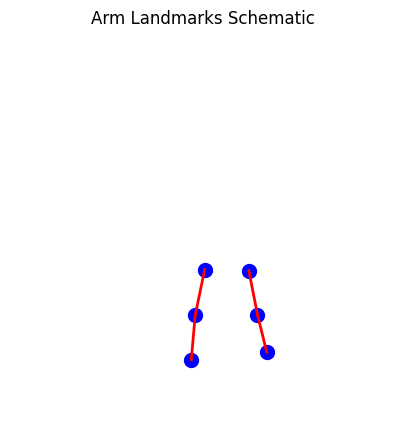

[ 0.62564391  0.62085301 -0.04865959  0.5108577   0.62308902 -0.05509882
  0.65220058  0.73277855  0.03071782  0.48730913  0.73986113  0.00551662
  0.67399782  0.83491665 -0.10356683  0.47810945  0.85447943 -0.11521085]
2
left


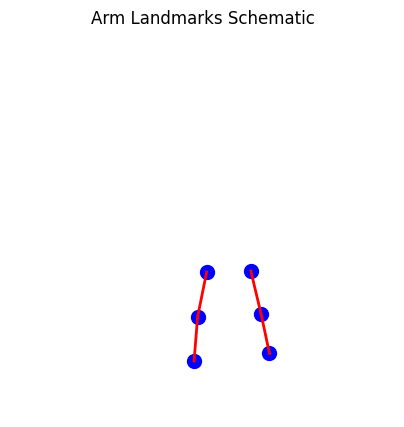

[ 0.60975784  0.62071013 -0.01605185  0.4947629   0.6253342  -0.0474357
  0.63410079  0.73156893  0.08883693  0.47448492  0.74355477 -0.00885194
  0.6571871   0.83191127 -0.02596718  0.47276288  0.85225987 -0.14453991]
2
left


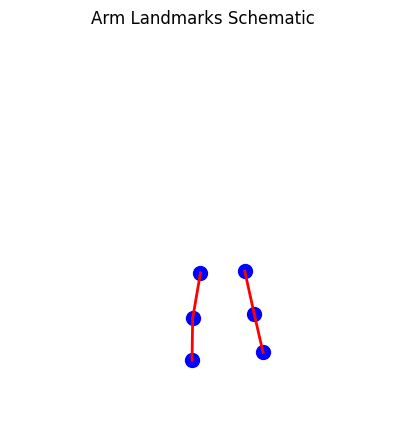

[ 0.58153081  0.60181212 -0.09571774  0.47465062  0.62394053 -0.14215894
  0.61013842  0.73227221  0.06768841  0.41962656  0.75263327 -0.0671422
  0.63014716  0.85112822 -0.03725478  0.40391999  0.89027911 -0.22203462]
2
left


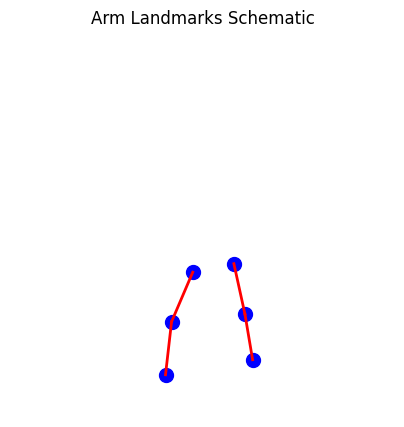

[ 0.50922012  0.66559875 -0.05699944  0.35783964  0.66408509 -0.06158213
  0.54297626  0.81982261 -0.01616569  0.28767559  0.73681504 -0.33126897
  0.56166333  0.95493394 -0.16885415  0.24292037  0.72508347 -0.90918332]
2
right


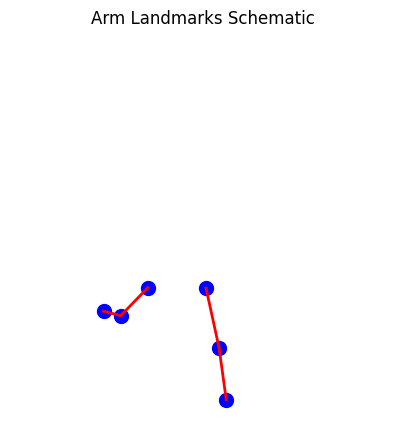

[ 0.6293208   0.72654325 -0.17025086  0.44319016  0.72262609 -0.13118052
  0.68114251  0.91486084 -0.16155013  0.35835841  0.79138297 -0.35502958
  0.70124853  1.06617665 -0.31631914  0.28291392  0.72214657 -0.8806926 ]
2
right


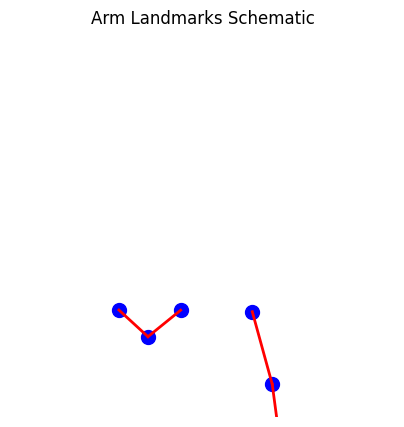

[ 0.61111248  0.72192252 -0.17494223  0.41035256  0.74437976 -0.41581112
  0.71905518  0.63870984 -0.1961685   0.3344864   0.94159806 -0.50882852
  0.80954379  0.49189392 -0.32771072  0.38784838  1.00456583 -0.65760833]
2
left


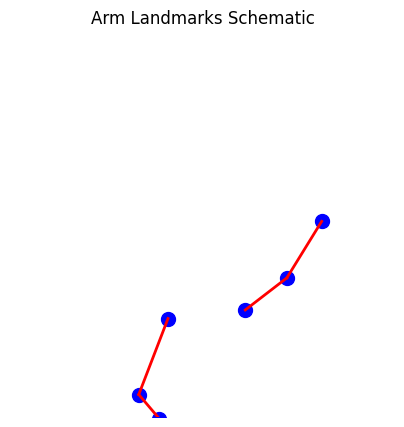

[ 0.65760344  0.65464795 -0.1761277   0.51120174  0.65644968 -0.182521
  0.68217003  0.81007653 -0.09346291  0.48499507  0.80213451 -0.11782782
  0.67694193  0.94656253 -0.25463051  0.48040524  0.92735291 -0.29304701]
3
left


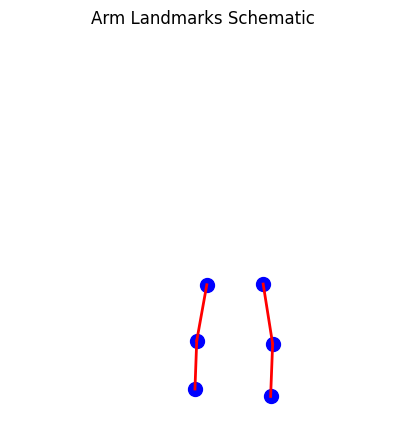

[ 0.61754191  0.64099145 -0.12572919  0.47085539  0.63003409 -0.07372694
  0.63453597  0.80063123 -0.10476574  0.40317097  0.72168088 -0.12983823
  0.62170863  0.93825287 -0.28837594  0.33242244  0.73243845 -0.46895599]
3
right


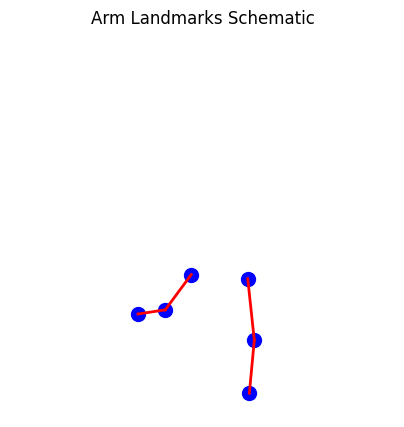

[ 0.60470575  0.61510432 -0.04930652  0.46682692  0.63269222 -0.07595547
  0.67291796  0.56765258  0.01451864  0.4343918   0.75955456 -0.0898036
  0.74769104  0.47803989 -0.079376    0.44790554  0.87884688 -0.14680757]
3
left


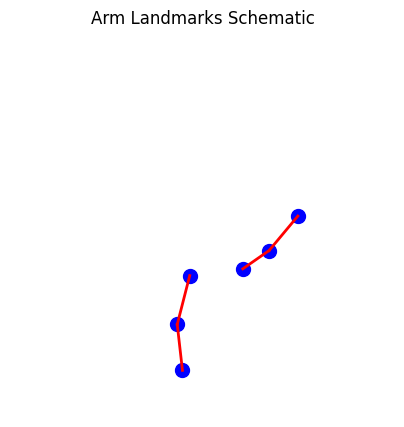

[ 0.63538462  0.6500842  -0.16886529  0.48328075  0.62629384 -0.07023435
  0.64900422  0.81513792 -0.15882301  0.38648397  0.59782434 -0.15171626
  0.64539301  0.95500875 -0.33632296  0.3079173   0.49274457 -0.44008666]
3
right


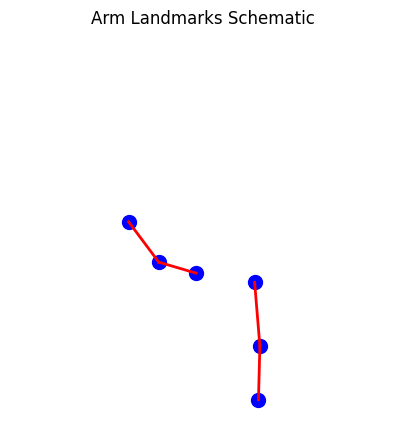

[ 0.61019385  0.63318008 -0.14188462  0.45557028  0.62717688 -0.22290829
  0.63945901  0.79724348 -0.04078384  0.43816996  0.79965591 -0.18902621
  0.70213276  0.91119307 -0.20995267  0.44275934  0.92785573 -0.38145003]
3
left


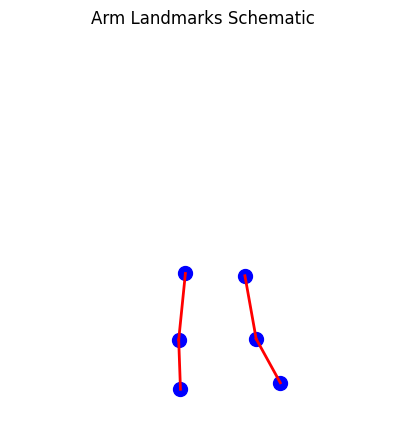

[ 0.61050272  0.63485551 -0.16505018  0.45637384  0.61805111 -0.09152187
  0.62700438  0.79741931 -0.19348921  0.3620688   0.58115965 -0.15156397
  0.62139821  0.93112731 -0.41256467  0.27742872  0.48768988 -0.42430586]
3
right


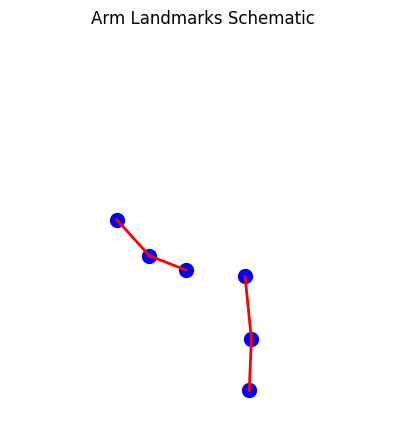

[ 0.55106157  0.65539742 -0.16195256  0.40921697  0.65990341 -0.16242751
  0.62090814  0.7406078  -0.08915994  0.39529246  0.81692445 -0.14312249
  0.71426839  0.78778291 -0.12769559  0.43395609  0.88776594 -0.2778987 ]
4
left


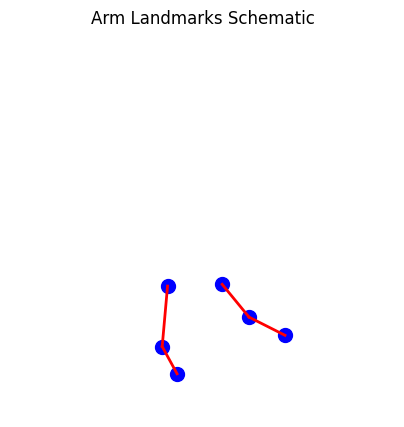

[ 0.61141098  0.65606862 -0.20593524  0.47355109  0.66144955 -0.13413492
  0.62774801  0.79773718 -0.16625096  0.46715325  0.81269056 -0.06832888
  0.6130963   0.85562015 -0.20820343  0.50094569  0.88271177 -0.22045061]
4
left


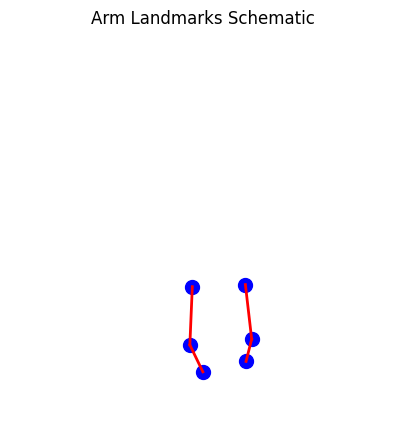

[ 0.51206619  0.6482712  -0.2259638   0.37352347  0.62507981 -0.04283421
  0.53359151  0.7982356  -0.27933079  0.27626017  0.57735366 -0.01866865
  0.52903157  0.93466461 -0.40194076  0.18908408  0.50089175 -0.11960649]
4
right


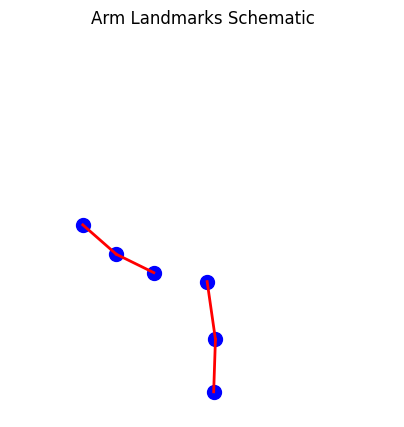

[ 0.60358959  0.64848244 -0.13321404  0.46008167  0.66230649 -0.09742374
  0.70264661  0.65509051 -0.1683533   0.42666492  0.80259329 -0.05308155
  0.80702603  0.59114265 -0.31348544  0.40906715  0.95547116 -0.16342023]
4
stop


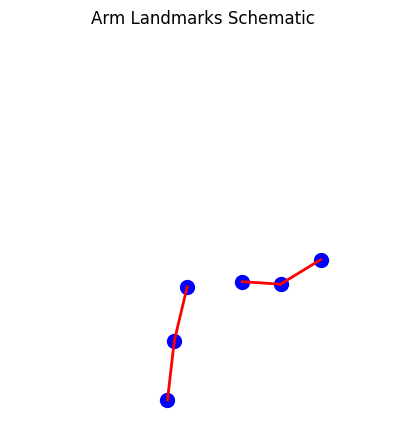

[ 0.64535034  0.69257677 -0.17109874  0.50344652  0.66393954 -0.04023423
  0.66386926  0.85829979 -0.2026927   0.41262823  0.63238126 -0.21670608
  0.65996772  0.9962545  -0.35700008  0.34831998  0.51807392 -0.56059176]
4
right


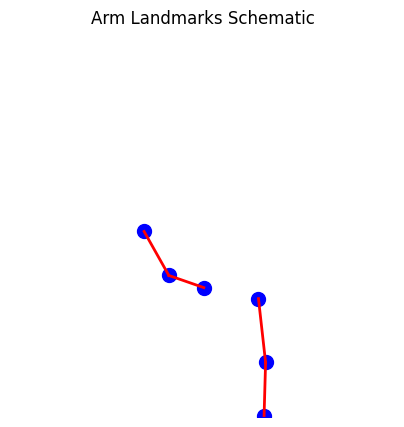

[ 0.6244626   0.65570354 -0.08174043  0.47932673  0.69517785 -0.11288504
  0.72500467  0.64293635 -0.10785507  0.45751724  0.86015689 -0.1107461
  0.81709921  0.57703358 -0.26765627  0.46336374  0.98450541 -0.23905626]
4
left


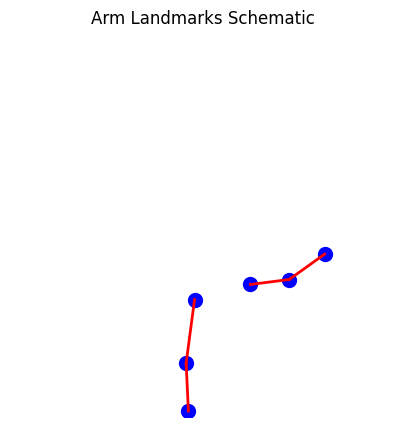

[ 0.6214301   0.66874999 -0.10464983  0.47970504  0.69251508 -0.11095691
  0.70573056  0.67931801 -0.06834892  0.45691222  0.85816365 -0.11670883
  0.81278306  0.64643991 -0.18110058  0.45951605  0.98412174 -0.30028147]
4
left


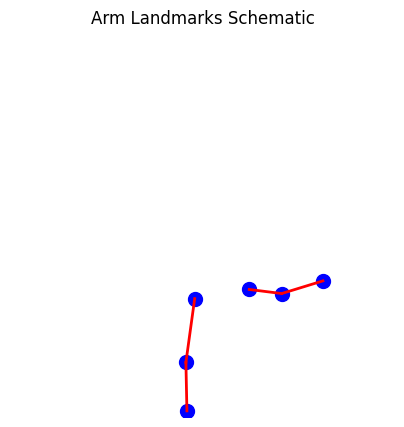

[ 0.53811228  0.63973349 -0.15708613  0.40843129  0.61715877  0.04617931
  0.55979156  0.80188745 -0.18024807  0.35983667  0.60340798  0.00403463
  0.5520283   0.94011104 -0.2804442   0.3563599   0.52368104 -0.16439006]
5
right


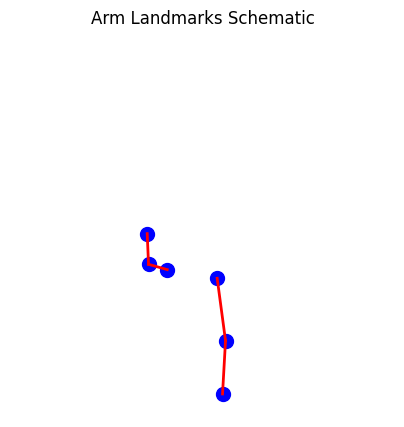

[ 0.56365377  0.62086272 -0.16575128  0.442792    0.6167233   0.00418338
  0.61784905  0.62783355 -0.65573692  0.39041752  0.6048457  -0.00487686
  0.6375646   0.59475434 -1.12003767  0.36405981  0.53951138 -0.08980878]
5
stop


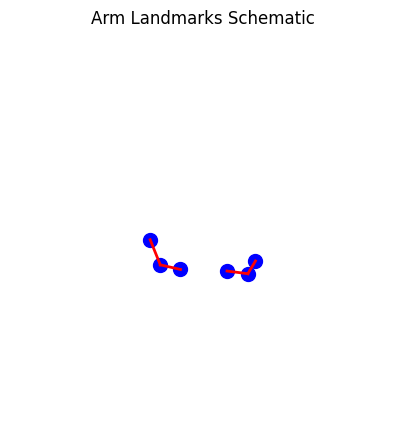

[ 0.5694477   0.62397766 -0.19869038  0.43641934  0.62594998  0.00870329
  0.66450059  0.68198317 -0.32842129  0.37198907  0.65876013  0.05256764
  0.77592707  0.7159723  -0.59291136  0.28217566  0.67200273 -0.0201195 ]
5
stop


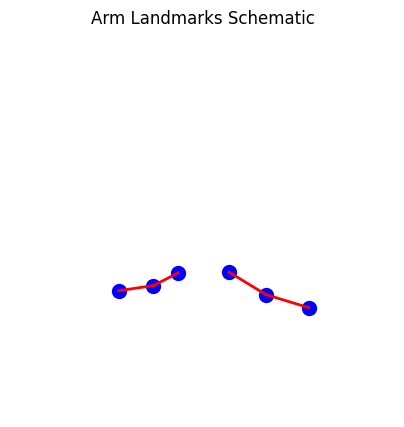

[ 0.57240611  0.64229846 -0.1440275   0.44310468  0.62487561  0.05271579
  0.59353769  0.78864789 -0.18630476  0.36265951  0.63754344 -0.09647179
  0.58265471  0.92118299 -0.33784607  0.34104487  0.58468884 -0.49066845]
5
right


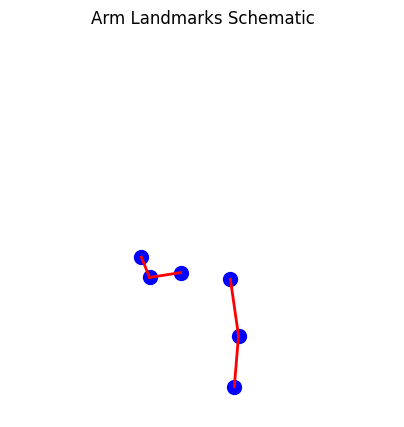

[ 0.53224683  0.64353639 -0.15489158  0.40160257  0.63938844 -0.00222843
  0.5543586   0.80185926 -0.1639595   0.33678055  0.69255602 -0.17619772
  0.54654002  0.93673426 -0.31511709  0.28573877  0.6896652  -0.67494261]
5
right


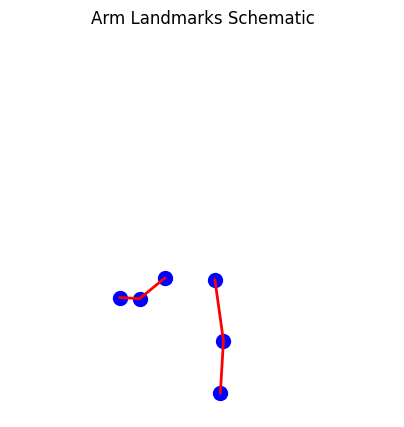

[ 0.58403563  0.63574874 -0.20566988  0.41872096  0.61061352 -0.02222993
  0.60923105  0.81592095 -0.18975398  0.33113784  0.59338421 -0.20962986
  0.60266602  0.97373831 -0.3324616   0.27300704  0.48472869 -0.61622649]
5
right


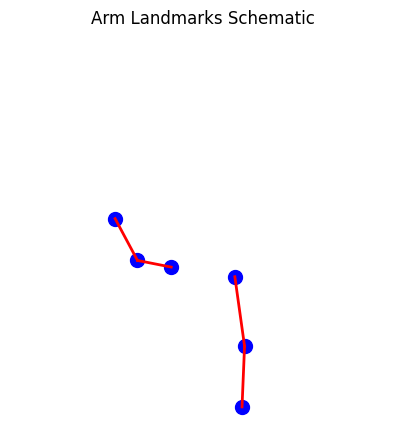

[ 0.51675308  0.62102616 -0.1301824   0.39151791  0.61522537 -0.02031234
  0.55569744  0.74359894 -0.14573114  0.3398819   0.67621326 -0.09164716
  0.57753032  0.86259156 -0.33906376  0.28547791  0.48338243 -0.46572781]
6
right


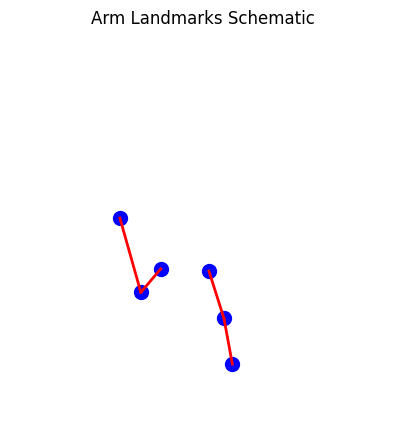

[ 0.51746452  0.62562102 -0.15676823  0.38803086  0.6213671  -0.13710859
  0.53737414  0.78314018 -0.12889211  0.34587044  0.77323192 -0.11499028
  0.53492409  0.92153257 -0.32222694  0.32610041  0.89896661 -0.37566119]
6
right


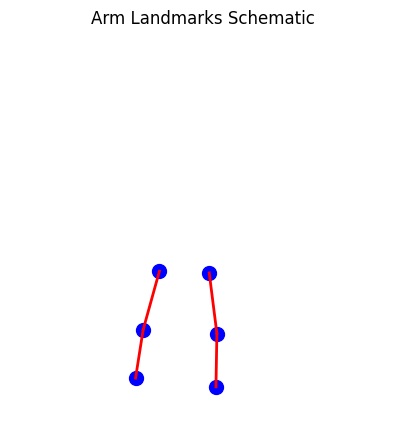

[ 0.51601237  0.62821186 -0.1186314   0.38202253  0.6246413  -0.10986838
  0.52903646  0.78933471 -0.09414636  0.35072356  0.78358734 -0.07974126
  0.51884973  0.92418957 -0.29210681  0.34600657  0.91874021 -0.28756127]
6
right


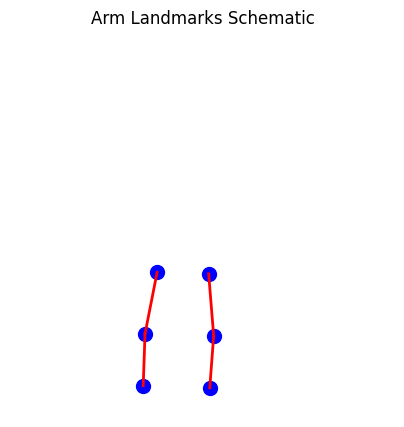

[ 0.51145023  0.65235561 -0.13141587  0.37711188  0.64844865 -0.11699108
  0.51996034  0.82758015 -0.14704776  0.35084587  0.81255782 -0.0895883
  0.50562829  0.97912109 -0.29426238  0.34693143  0.95313829 -0.30425078]
6
right


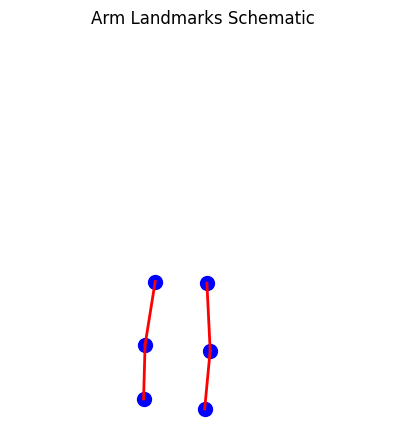

[ 0.50105059  0.66962487 -0.06525011  0.36392158  0.66837394 -0.12616116
  0.58667463  0.73858589  0.00345537  0.3398754   0.83265364 -0.11331683
  0.679874    0.7500183  -0.16170183  0.32936305  0.9643656  -0.28746122]
6
left


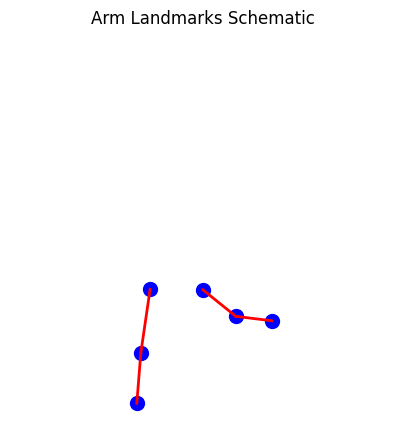

[ 0.51039684  0.67186934 -0.1527504   0.37187177  0.66627491 -0.13769992
  0.5233686   0.84114176 -0.12047736  0.35134074  0.83196139 -0.09045651
  0.51848143  0.96778816 -0.30379415  0.34628361  0.9674955  -0.30982304]
6
right


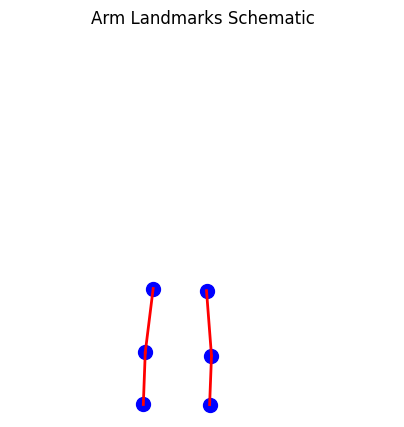

[ 0.57424039  0.64816886 -0.16289631  0.43606275  0.68005115 -0.17899971
  0.66594452  0.63581455 -0.12531868  0.41460013  0.83487028 -0.12579583
  0.7624678   0.60501856 -0.2757788   0.42292684  0.959921   -0.2797876 ]
7
left


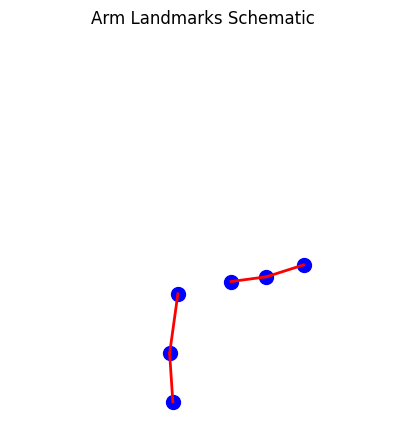

[ 0.59098256  0.68320274 -0.16645721  0.45151359  0.65526974 -0.10252593
  0.60582805  0.83927077 -0.16811566  0.3601535   0.63860059 -0.1138673
  0.60122889  0.96531689 -0.34045857  0.28591114  0.5520038  -0.34517759]
7
right


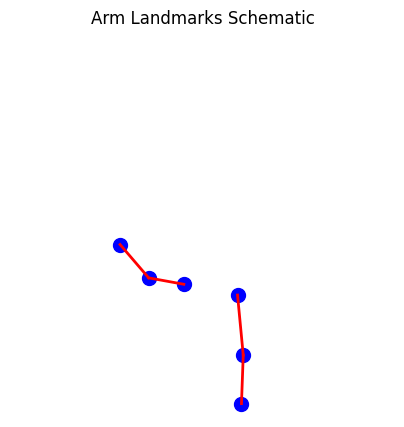

[ 0.5914396   0.68329537 -0.06752563  0.45002708  0.66198897 -0.04185568
  0.61192834  0.81090087 -0.16410545  0.40995866  0.79863453 -0.13726759
  0.63403016  0.88484246 -0.55644137  0.41579157  0.90991133 -0.47408763]
7
stop


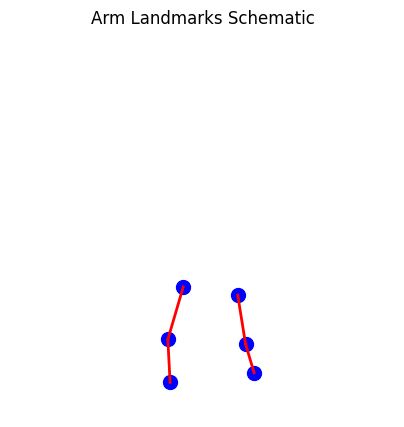

[ 0.58825326  0.70329535 -0.13499731  0.44249424  0.69049764 -0.21484633
  0.66951221  0.75489527 -0.05401211  0.41909903  0.84475082 -0.14922662
  0.76602852  0.7444362  -0.1902706   0.41734943  0.96659553 -0.26062515]
7
left


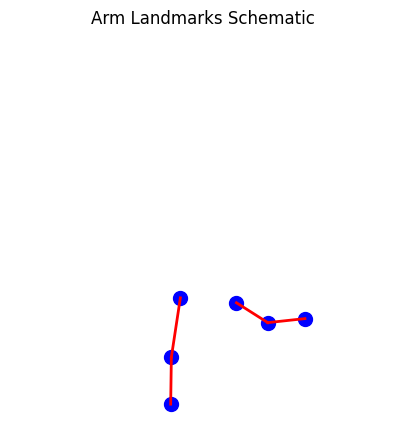

[ 0.59434426  0.70631462 -0.13753203  0.45699167  0.67327559 -0.07700274
  0.61087912  0.86619371 -0.12711975  0.36659214  0.65558654 -0.20640972
  0.60538262  0.99427307 -0.30099005  0.30371222  0.55557668 -0.53770101]
7
right


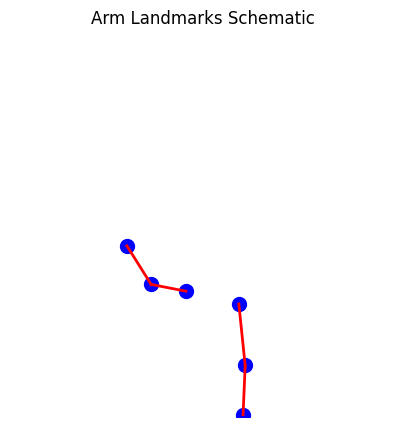

[ 0.59508431  0.71285892 -0.13773879  0.45957333  0.67888451 -0.05430263
  0.60197687  0.87415147 -0.14495677  0.37285343  0.66630715 -0.16105139
  0.59203494  0.98099643 -0.3080132   0.30772856  0.55929887 -0.47055659]
7
right


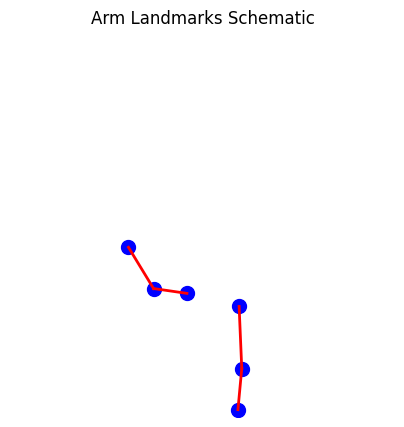

[ 0.57432669  0.70081031 -0.09677516  0.42713422  0.69014454 -0.204161
  0.61009365  0.83243614 -0.01112308  0.39903191  0.86057508 -0.16543874
  0.67926633  0.90643603 -0.20948879  0.40739402  0.99260402 -0.3494783 ]
7
left


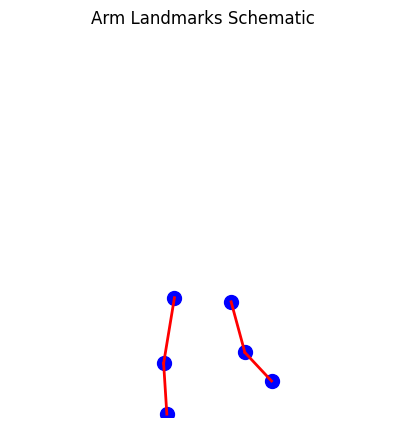

[ 0.60266221  0.66349256 -0.16915935  0.47151613  0.65727401 -0.18546657
  0.6210174   0.79182982 -0.09583609  0.44657436  0.79332423 -0.13199565
  0.627101    0.91138554 -0.19250448  0.44993562  0.91174757 -0.22442062]
8
left


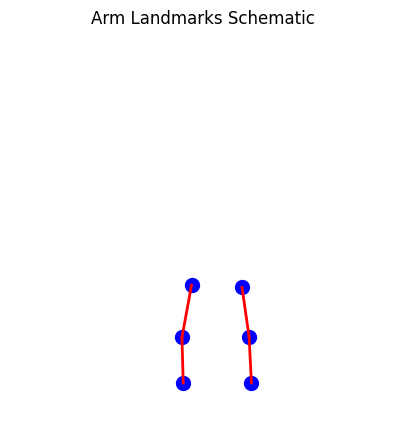

[ 0.61315691  0.64200366 -0.06008018  0.46902233  0.64110512 -0.09193794
  0.67133212  0.75302279 -0.1315762   0.41989559  0.72612298 -0.22677009
  0.70876408  0.74922335 -0.39887485  0.37260562  0.75424564 -0.57048386]
8
stop


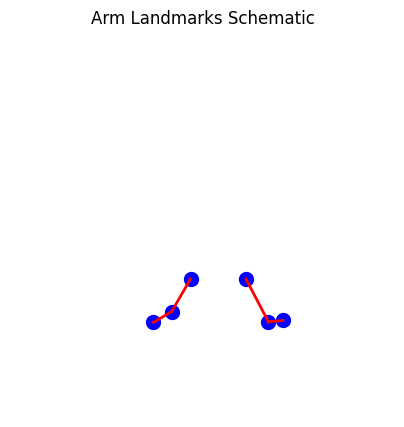

[ 0.61447567  0.6423614  -0.15128253  0.47151446  0.63477981  0.02010901
  0.65937817  0.76205599 -0.17621507  0.42366567  0.72152489 -0.00608867
  0.67885005  0.88953274 -0.33856982  0.36752465  0.77087963 -0.42255378]
8
stop


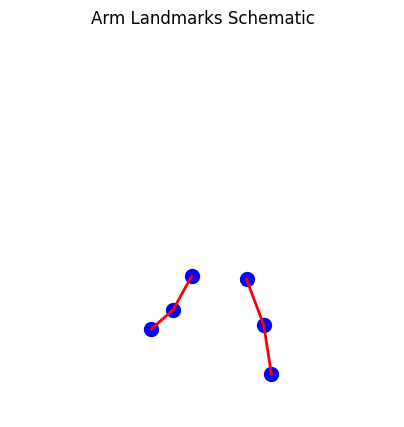

[ 0.61273456  0.65154582 -0.18148102  0.4704527   0.634022   -0.02288192
  0.64680636  0.80770695 -0.20302172  0.39150149  0.59377217 -0.21089537
  0.64669716  0.94495565 -0.32481498  0.37464821  0.45824125 -0.5537852 ]
8
right


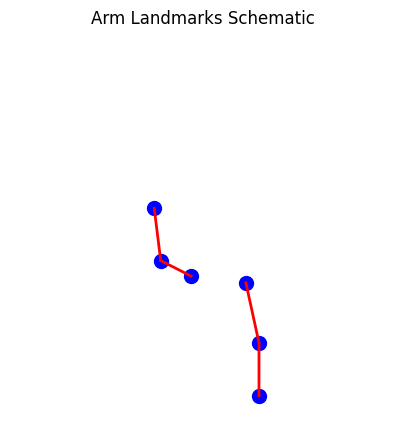

[ 0.60829234  0.67236537 -0.0831615   0.45593399  0.67675596 -0.11440609
  0.66127223  0.78796184 -0.19121009  0.41162863  0.84232974 -0.04858281
  0.69627798  0.73243552 -0.54619914  0.42294607  0.98362321 -0.16366167]
8
stop


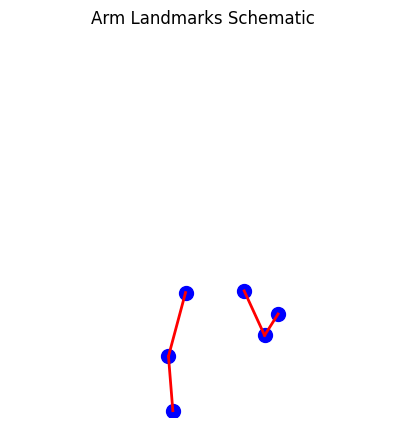

[ 0.59278429  0.64668882 -0.12641285  0.44371834  0.68381822 -0.19731089
  0.68764478  0.6040768  -0.08950423  0.41587156  0.85136467 -0.19070689
  0.78584301  0.57656878 -0.22574714  0.42590189  0.99801624 -0.36379221]
8
left


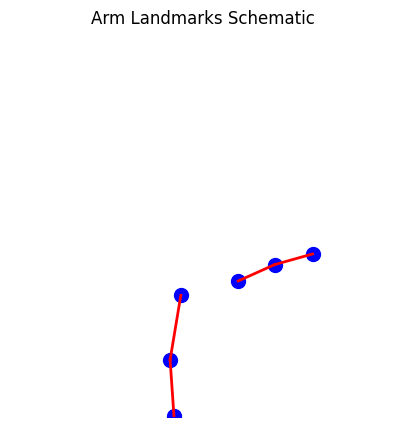

[ 0.6024884   0.70427763 -0.12648812  0.45077366  0.68273622 -0.09035634
  0.63428819  0.87008119 -0.0983543   0.36527207  0.65044767 -0.09312636
  0.63552082  0.99180287 -0.31828529  0.27583531  0.58614796 -0.29671246]
8
right


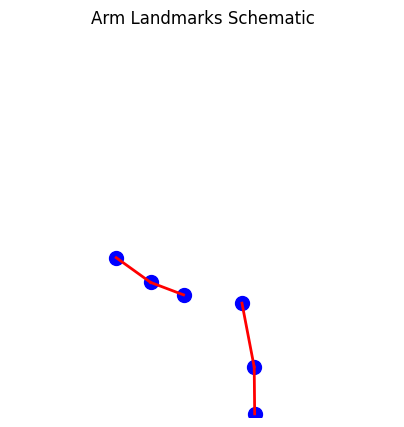

[ 0.60247386  0.69513506 -0.10247336  0.4501819   0.7031213  -0.15186474
  0.69047105  0.67869568 -0.08492865  0.41154033  0.86352652 -0.15522568
  0.77935153  0.61638749 -0.22716573  0.42131194  0.99814963 -0.31146151]
8
left


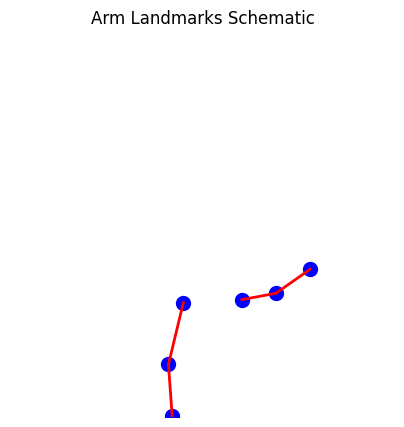

[ 0.60696661  0.67617112 -0.08540478  0.44904572  0.70429474 -0.14606413
  0.69312608  0.6237095  -0.09567017  0.42199197  0.87241745 -0.08475533
  0.77928442  0.52973533 -0.23425035  0.43601865  1.00175011 -0.14827143]
8
left


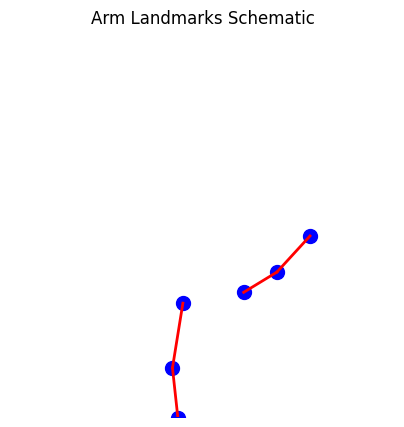

[ 0.52129424  0.29259151 -0.16509612  0.32221881  0.29939604 -0.26431105
  0.61476916  0.49173927 -0.10518493  0.24252287  0.50139791 -0.50479466
  0.51159853  0.60947907 -0.20256138  0.36818606  0.48581266 -0.87961805]
9
right


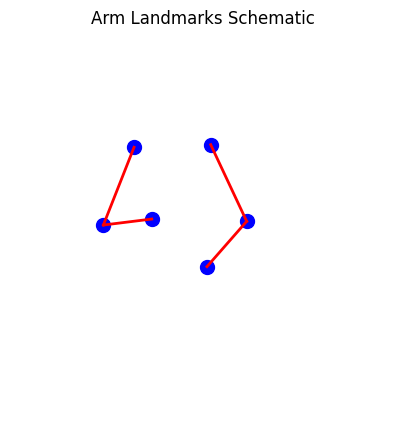

[ 0.58693278  0.5592525  -0.17766227  0.41344443  0.52833474 -0.13127774
  0.61077058  0.75866884 -0.1585705   0.28394514  0.50831866 -0.10782447
  0.51269341  0.88486779 -0.29017437  0.21444182  0.47020194 -0.2699385 ]
9
right


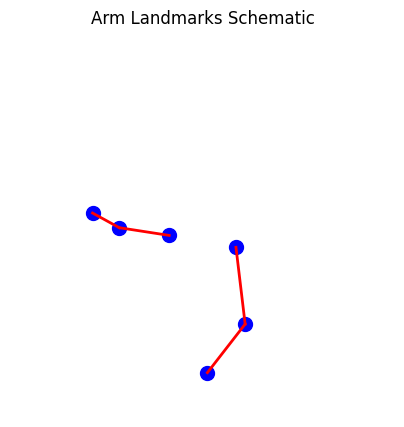

[ 0.58849204  0.54152805 -0.05183395  0.40076512  0.54529458 -0.04343608
  0.71531588  0.72293955  0.02478928  0.27558798  0.51406783  0.04913635
  0.84719074  0.55347574 -0.08458561  0.16307227  0.47715649 -0.02996273]
9
stop


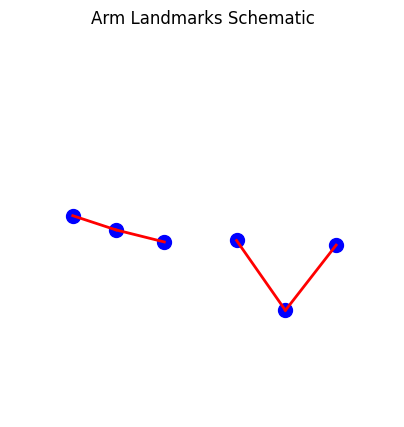

[ 0.58650327  0.55367607 -0.21730451  0.41007957  0.52755493 -0.12482183
  0.60808092  0.76488984 -0.24478707  0.28397736  0.48598081 -0.12608057
  0.58954006  0.90822303 -0.43693757  0.16480435  0.40610951 -0.26036543]
9
right


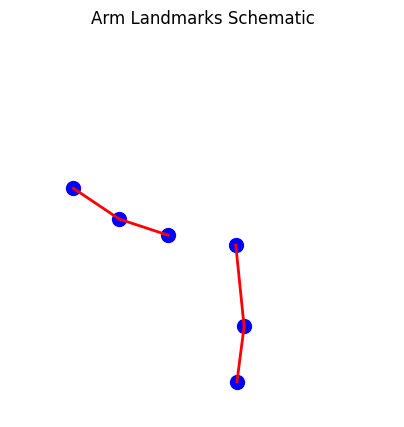

[ 0.57826841  0.53190452 -0.18526074  0.40109459  0.55748636 -0.23227096
  0.69373125  0.52985865 -0.09525119  0.36060289  0.72451884 -0.11041695
  0.8260271   0.49918142 -0.13630646  0.36771736  0.86059964 -0.08460919]
9
left


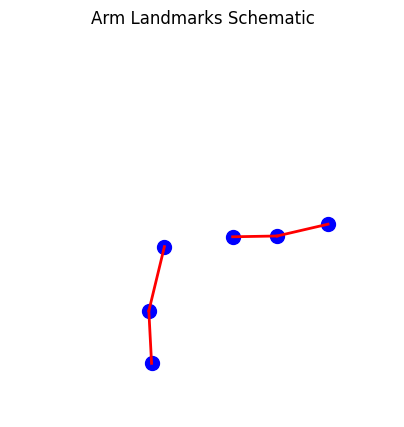

[ 0.57334322  0.57540876 -0.13416019  0.40723038  0.58391136 -0.20700809
  0.63037509  0.75814664  0.00668877  0.38613674  0.75999367 -0.15870932
  0.7377454   0.85657799 -0.12019668  0.38356447  0.88800579 -0.3389774 ]
9
left


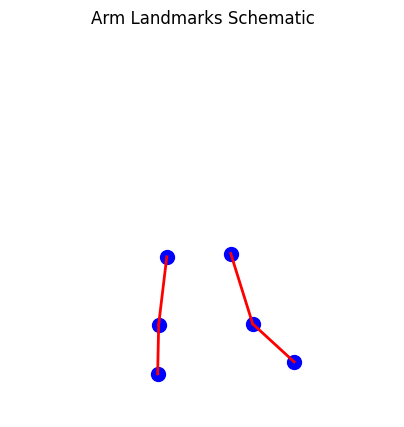

[ 0.58382881  0.70829964 -0.19616458  0.41149053  0.71236438 -0.3009305
  0.69485372  0.84478748 -0.09099488  0.38380033  0.91084492 -0.29357439
  0.83251953  0.89846075 -0.22907183  0.36012688  1.05545068 -0.48362455]
10
left


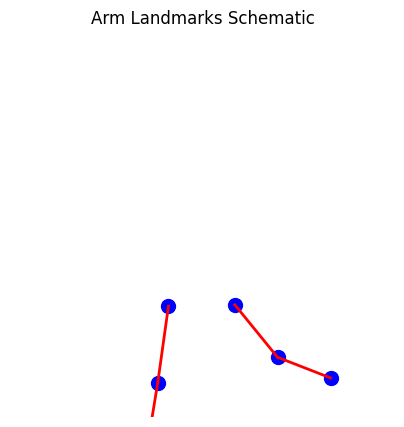

[ 0.59191388  0.73565716 -0.06964056  0.41735172  0.70546764 -0.15118787
  0.63165075  0.92871159 -0.04797618  0.33545688  0.640477   -0.43266016
  0.64991188  1.09857523 -0.14676937  0.24550815  0.50683051 -0.86545944]
10
right


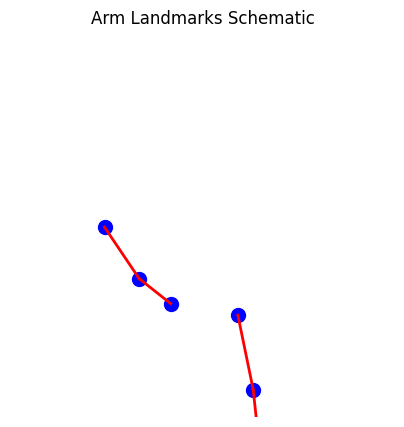

[ 0.59082764  0.72240317 -0.14053775  0.41712803  0.72454697 -0.14542161
  0.66677052  0.62588632 -0.28624588  0.34613845  0.85072708 -0.0014382
  0.75857759  0.48017281 -0.49666572  0.25559011  0.99090862  0.03984087]
10
stop


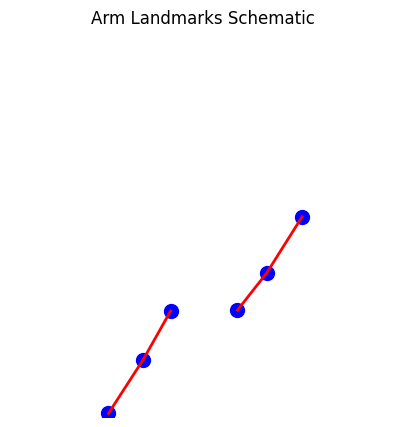

[ 0.59170324  0.73448044 -0.09004532  0.41410989  0.72173488 -0.11398385
  0.63975811  0.9055407  -0.17264546  0.29341435  0.68489265 -0.30978733
  0.59001142  1.00277317 -0.45810738  0.19606321  0.60157418 -0.77658212]
10
right


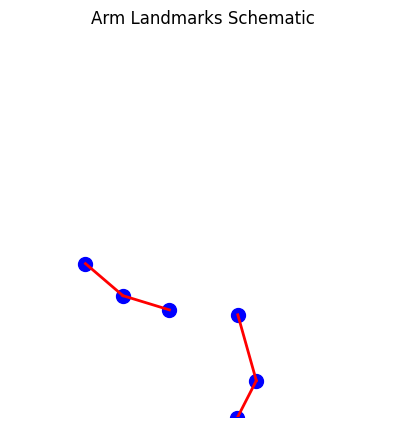

[ 0.60191977  0.75058877 -0.10871518  0.41926402  0.71552157 -0.11656704
  0.63478017  0.94046891 -0.20431426  0.28862363  0.66141313 -0.28460759
  0.59985292  1.05929697 -0.51684821  0.18689485  0.55924416 -0.64265084]
10
right


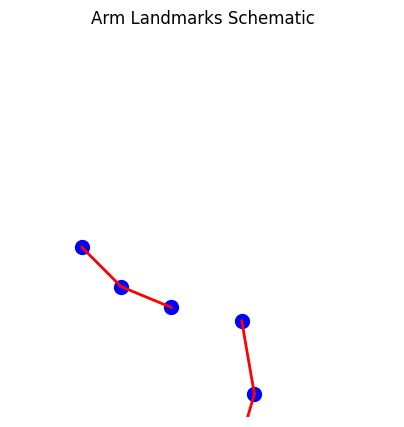

[ 0.58578843  0.72615016 -0.13859673  0.41611952  0.74096268 -0.24512625
  0.71909851  0.77725643 -0.06790666  0.37213445  0.92075318 -0.22454333
  0.85711229  0.74106109 -0.21520805  0.38547465  1.03583455 -0.28122312]
10
left


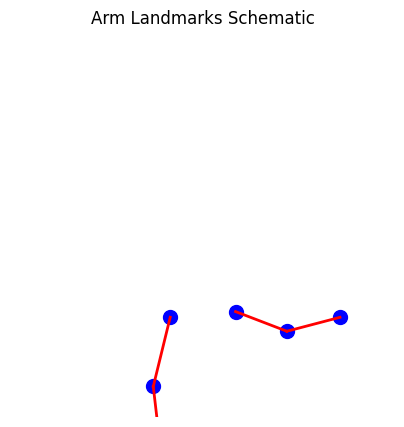

[ 0.60372156  0.59683323 -0.27796018  0.42991868  0.5651902  -0.22029404
  0.60925829  0.80971462 -0.24288456  0.28536609  0.55202752 -0.18853034
  0.60954946  0.98111141 -0.33053458  0.14698382  0.47723228 -0.24887231]
11
right


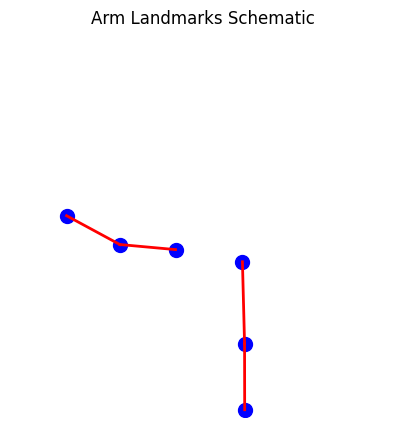

[ 0.60303462  0.58825022 -0.42452449  0.42331219  0.56581998 -0.39594564
  0.72864079  0.65354425 -0.44972843  0.26095536  0.59807527 -0.39110559
  0.86273688  0.58065313 -0.60780966  0.1228955   0.53870404 -0.51486397]
11
stop


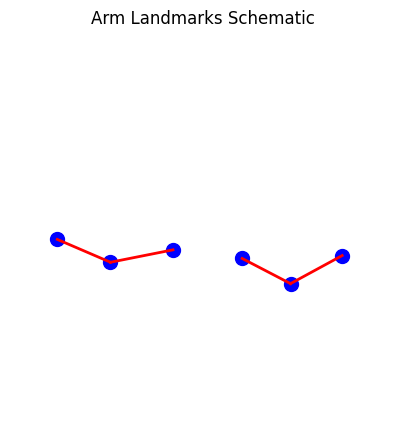

[ 0.60817373  0.62591803 -0.46480459  0.43057579  0.59930956 -0.3092677
  0.65072209  0.83055133 -0.45893446  0.32292733  0.75399804 -0.25059444
  0.70339644  1.00468647 -0.59715396  0.19925982  0.86840469 -0.39123031]
11
stop


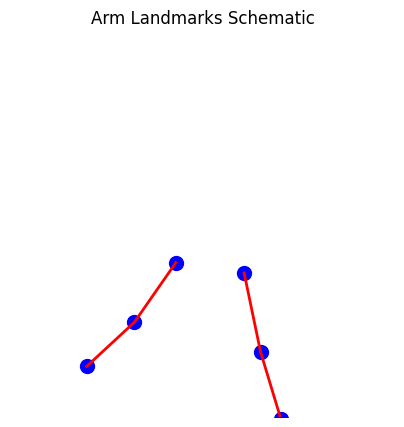

[ 0.58534569  0.55219424  0.04501052  0.40619239  0.60109764 -0.04509137
  0.71153367  0.50837147  0.01008651  0.36278751  0.79996526 -0.10479222
  0.8273446   0.40688387 -0.12067069  0.35949713  0.93675995 -0.25572985]
11
left


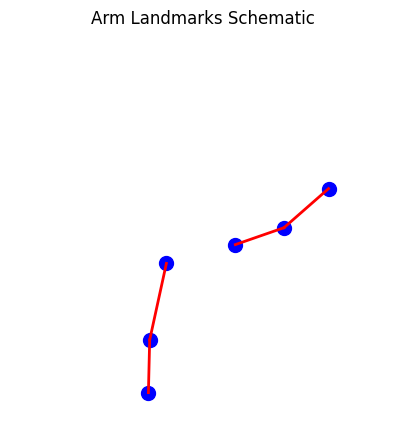

[ 0.59923148  0.55234629 -0.18561009  0.42386252  0.59307414 -0.26734045
  0.7134496   0.47730663 -0.24378391  0.38157043  0.7972548  -0.3587673
  0.82956058  0.35956496 -0.3924039   0.43307123  0.95221508 -0.53375018]
11
left


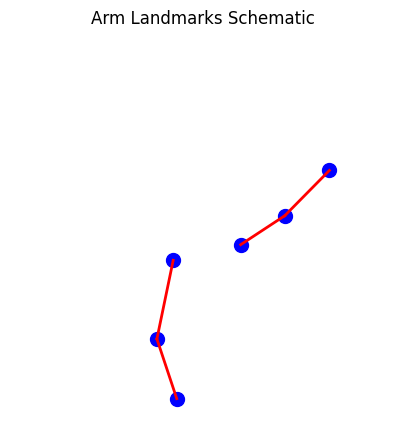

[ 6.00032091e-01  5.93797088e-01 -1.20819233e-01  4.24124718e-01
  5.78296781e-01  5.86306793e-04  6.30020261e-01  8.02544415e-01
 -9.57967788e-02  3.16917330e-01  5.16964912e-01  3.57634351e-02
  6.17473722e-01  9.63694572e-01 -2.27353498e-01  2.25851223e-01
  3.74202341e-01 -9.20657627e-03]
11
right


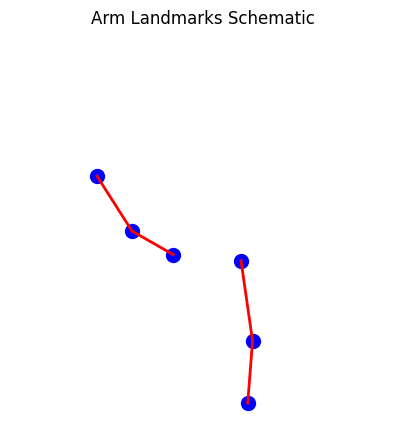

[ 0.60089523  0.61268681 -0.1994826   0.42476392  0.572837   -0.14511539
  0.62757063  0.83058065 -0.23838961  0.30401862  0.50379872 -0.15195498
  0.60823691  0.99529284 -0.48623896  0.19433811  0.37925109 -0.24652529]
11
right


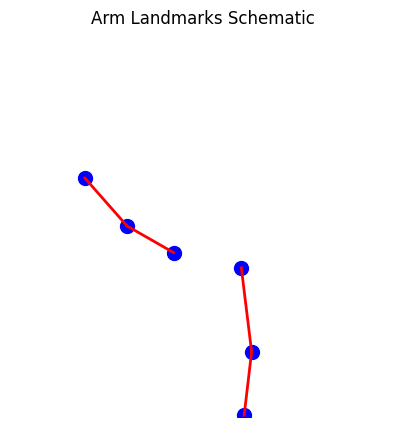

[ 0.58832866  0.55129886 -0.10772114  0.40805346  0.58012515 -0.20937788
  0.70924556  0.49094784 -0.12631117  0.34939855  0.78270489 -0.31663287
  0.82098466  0.36372009 -0.37105876  0.37189105  0.92231292 -0.47310859]
11
left


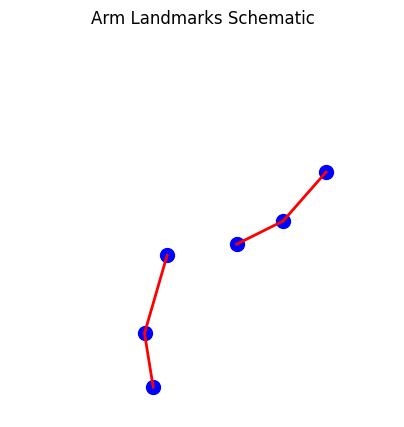

[ 0.5995366   0.65193886 -0.00427085  0.40806478  0.69312215 -0.07915621
  0.71819496  0.56239295  0.06589552  0.35195857  0.89000678 -0.06351242
  0.83221358  0.45646107  0.01513483  0.33089215  1.04425597 -0.24498002]
12
left


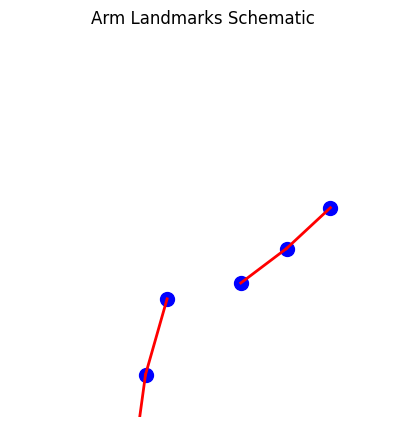

[ 0.6004228   0.65558052  0.02708093  0.40796781  0.66280556  0.02907978
  0.72806275  0.65283614  0.033551    0.2964825   0.66989833 -0.02558103
  0.82654512  0.52045864 -0.1028687   0.22211067  0.52563339 -0.16656981]
12
stop


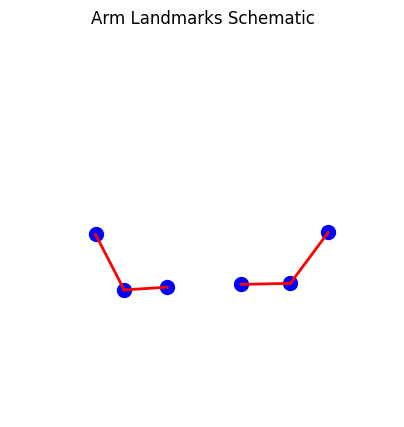

[ 0.61243093  0.69109625 -0.2357305   0.41939384  0.64542735 -0.19648339
  0.64533228  0.88988912 -0.22213021  0.2856943   0.63521683 -0.23103781
  0.64675701  1.06503141 -0.39149365  0.14320028  0.59433961 -0.42600507]
12
right


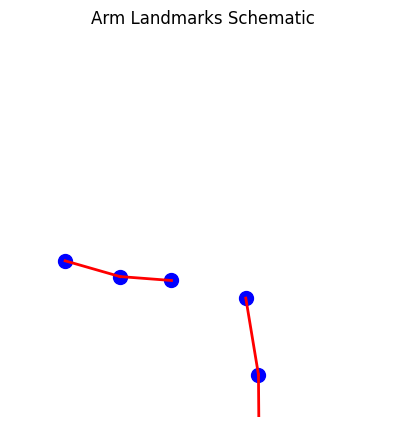

[ 0.60564774  0.66380882 -0.06812163  0.41174349  0.64441884 -0.0731472
  0.70227754  0.60171062 -0.11511336  0.29316837  0.57084423 -0.13453791
  0.78052151  0.43804032 -0.25233597  0.22174771  0.40867609 -0.29856068]
12
stop


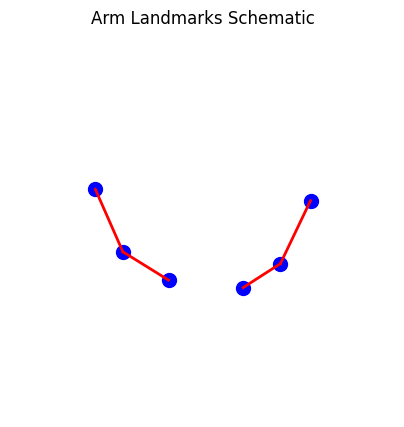

[ 0.60611957  0.6979112  -0.11332469  0.42925897  0.64777952 -0.04024829
  0.61527479  0.88785332 -0.19989641  0.33499172  0.61321193 -0.29420796
  0.53588474  0.99398106 -0.42809948  0.25186083  0.54009479 -0.80835038]
12
right


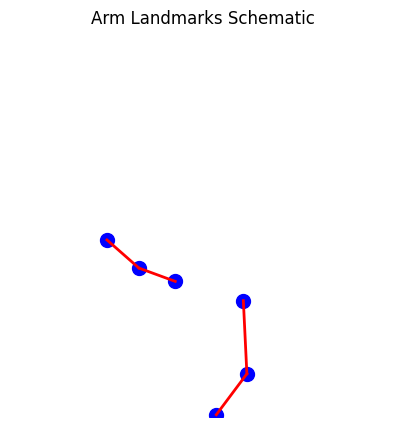

[ 0.60338366  0.67146415 -0.01176496  0.41815227  0.67153645 -0.10779373
  0.69953477  0.6283071  -0.02531949  0.35550863  0.84858686 -0.21657602
  0.8196764   0.51649511 -0.1454756   0.43335515  0.97386801 -0.60241926]
12
left


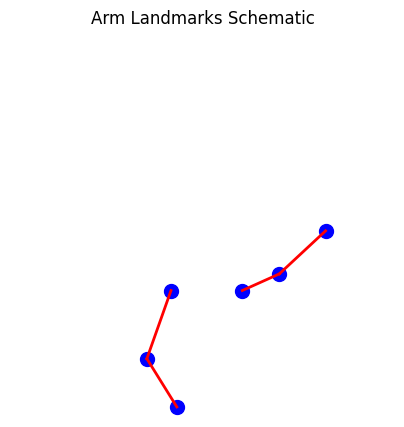

[ 5.95250905e-01  6.59990191e-01  7.46175938e-04  4.08847004e-01
  6.78619266e-01 -1.05305076e-01  6.96323931e-01  6.03935897e-01
 -3.32383141e-02  3.57699096e-01  8.60562146e-01 -1.84623092e-01
  7.96429574e-01  4.68464464e-01 -1.59102663e-01  4.37344879e-01
  9.85958874e-01 -4.32474047e-01]
12
left


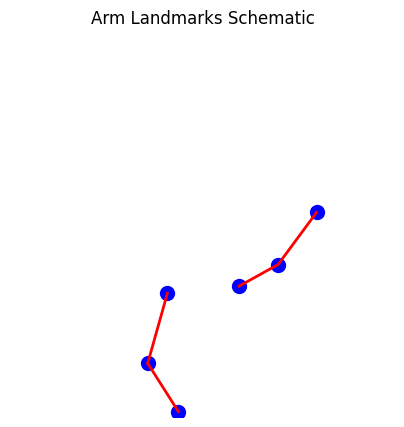

[ 0.5858655   0.69500059 -0.03000739  0.43329263  0.65816796 -0.14797565
  0.61789858  0.87363613 -0.01545409  0.41274795  0.74209875 -0.51758969
  0.61056674  0.9964841  -0.17497423  0.43736449  0.6887458  -1.03978026]
13
right


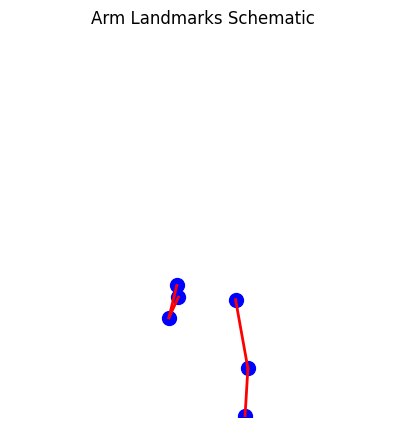

[ 0.56480873  0.65799463 -0.0220907   0.41021967  0.65046161 -0.04087803
  0.6038537   0.76953405 -0.28338772  0.36559248  0.74784219 -0.33008206
  0.62543672  0.75599355 -0.72991955  0.3367998   0.75396699 -0.82477081]
13
stop


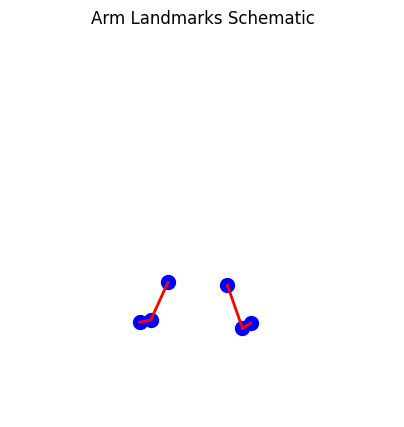

[ 0.56690109  0.69120717 -0.28761294  0.40430617  0.67774171 -0.16859964
  0.60409534  0.86927128 -0.48806772  0.31013274  0.79899305 -0.15621668
  0.55417013  0.78507143 -0.90538615  0.19448265  0.73770398 -0.39131939]
13
stop


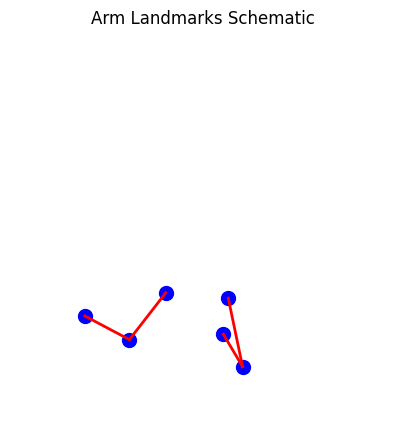

[ 0.61525714  0.65697414 -0.22673514  0.44165725  0.7017976  -0.3372879
  0.72949767  0.63123792 -0.22564153  0.41373172  0.86264056 -0.41625056
  0.83642799  0.55069852 -0.36222532  0.46343175  0.97162181 -0.65842432]
14
left


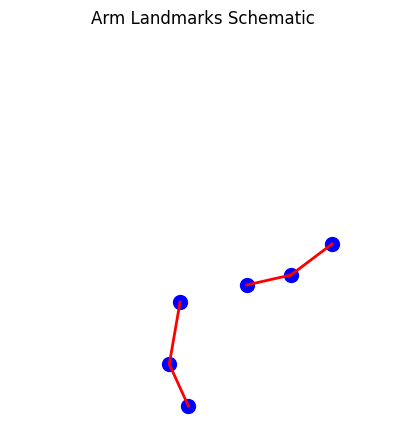

[ 0.61646587  0.65583634 -0.18930122  0.44204837  0.67278427 -0.20511575
  0.73906583  0.6325435  -0.22760431  0.33633965  0.65280503 -0.24549958
  0.82882106  0.52520835 -0.41051894  0.25643316  0.5449543  -0.42337614]
14
stop


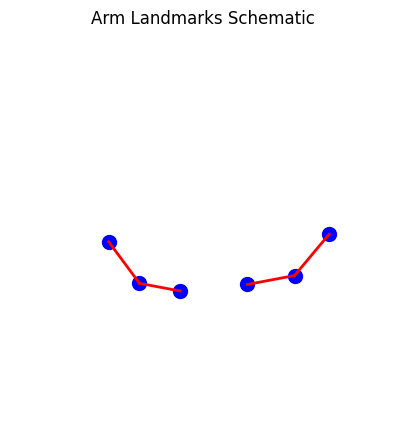

[ 0.61908144  0.65801227 -0.19401813  0.44116682  0.68599713 -0.19337614
  0.73494601  0.65078032 -0.2050643   0.41524267  0.84591579  0.03670308
  0.82708424  0.55909353 -0.38779894  0.45068875  0.96791714  0.13966587]
14
stop


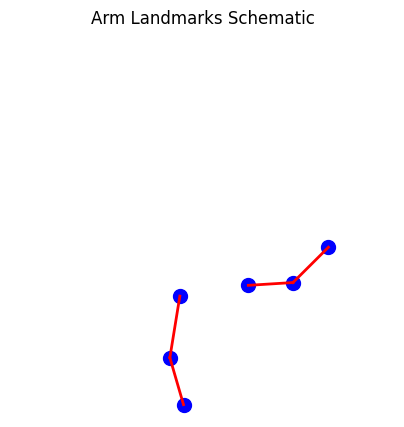

[ 0.61911285  0.67970359 -0.22080192  0.45396551  0.65774411 -0.04415673
  0.63658345  0.84990615 -0.28814751  0.36037683  0.64793271  0.00275894
  0.58070409  0.96937329 -0.48145676  0.23817763  0.62347299  0.00476564]
14
stop


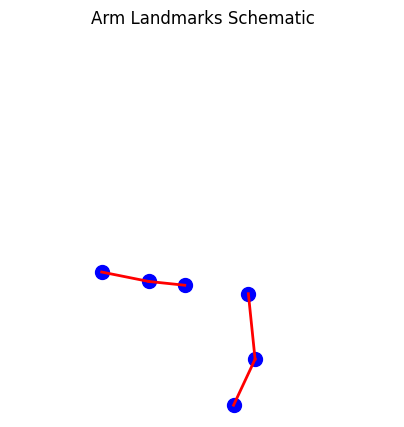

[ 0.62026393  0.69524014 -0.11002795  0.46221566  0.64472216 -0.05384097
  0.63897449  0.87930453 -0.10876559  0.35473222  0.63631016 -0.22791867
  0.64080656  1.00613379 -0.2478718   0.24778649  0.60516518 -0.65299714]
14
right


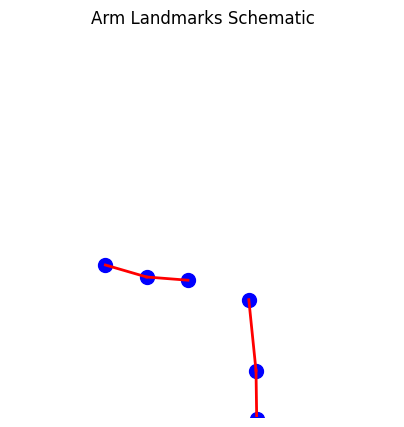

[ 0.60703945  0.65662664 -0.27697057  0.43316421  0.69557154 -0.32648617
  0.73412925  0.66904759 -0.1505381   0.40317565  0.88659221 -0.31466919
  0.84607822  0.65972328 -0.21720846  0.37971061  1.03537297 -0.49955004]
14
left


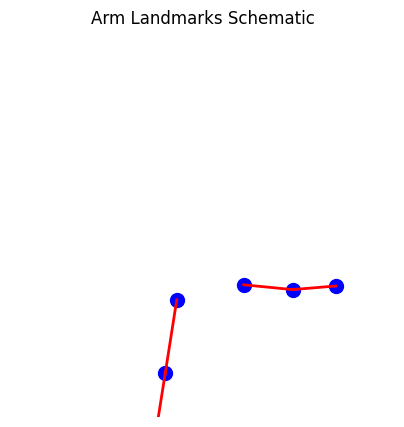

[ 0.62384117  0.70516491 -0.06932765  0.46299165  0.66916245 -0.04139223
  0.64705551  0.87634164 -0.07742464  0.35047442  0.65596789 -0.16860156
  0.64944768  1.00060463 -0.26818165  0.24262825  0.62124181 -0.54468912]
14
right


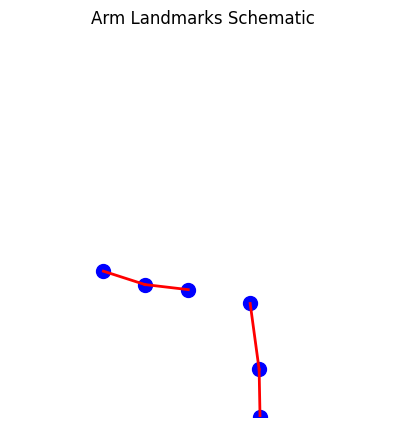

[ 0.62178582  0.6717577  -0.14112915  0.45272031  0.69236892 -0.25371855
  0.7248559   0.67060834 -0.10673958  0.40812436  0.8428151  -0.35196465
  0.83676827  0.65954083 -0.2536523   0.45881015  0.94185573 -0.64458686]
14
left


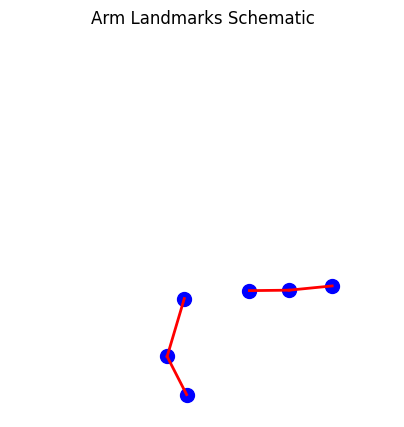

[ 0.62194514  0.66673261 -0.160946    0.44937402  0.70349753 -0.24671176
  0.74258876  0.66219175 -0.12008546  0.41519046  0.85834372 -0.32872465
  0.85659599  0.64382756 -0.26615182  0.45339236  0.95848203 -0.6232996 ]
14
left


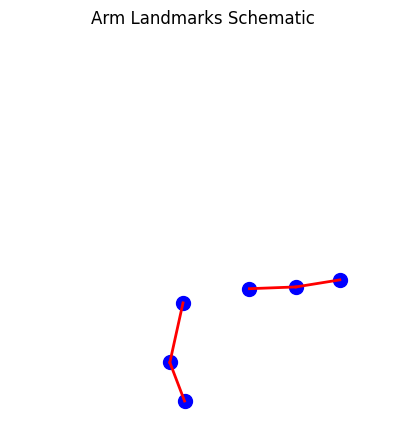

[ 0.59342718  0.68112272 -0.14832279  0.40860161  0.71552187 -0.14793396
  0.72454613  0.68759304 -0.13095757  0.37960401  0.90679079 -0.23266181
  0.87320817  0.65482724 -0.19267491  0.38735589  0.98933452 -0.47647923]
15
left


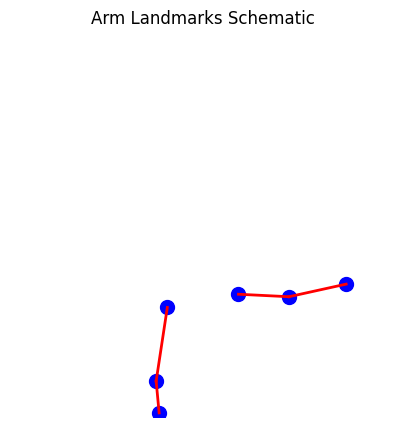

[ 0.57818663  0.70185047 -0.10601859  0.40203819  0.69264966 -0.07119391
  0.59647149  0.9069699  -0.23259425  0.37515187  0.89297229 -0.11558063
  0.55589902  0.93446338 -0.52293867  0.41686028  0.95668179 -0.35874093]
15
stop


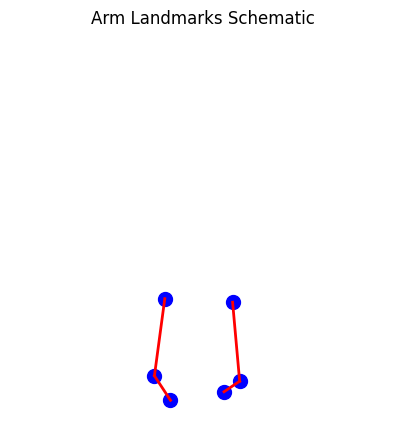

[ 0.58059919  0.71328133 -0.11347214  0.40281874  0.67448449 -0.10305619
  0.59504539  0.9091503  -0.1779165   0.25866219  0.64706433 -0.14230086
  0.57504642  1.00808275 -0.42692694  0.11373502  0.5944162  -0.2808632 ]
15
right


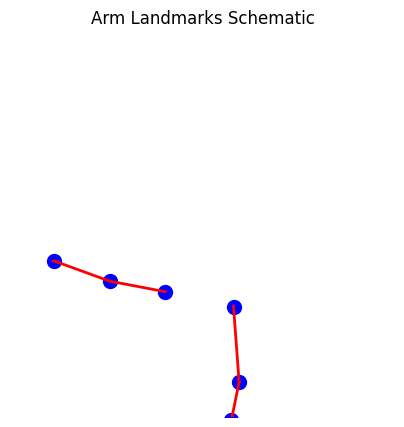

[ 0.58973306  0.69148892 -0.24323614  0.399692    0.67706335 -0.19358201
  0.72955841  0.69100249 -0.26919195  0.24756482  0.64985877 -0.20970559
  0.87909353  0.66638839 -0.45204359  0.10707144  0.61514461 -0.44029301]
15
stop


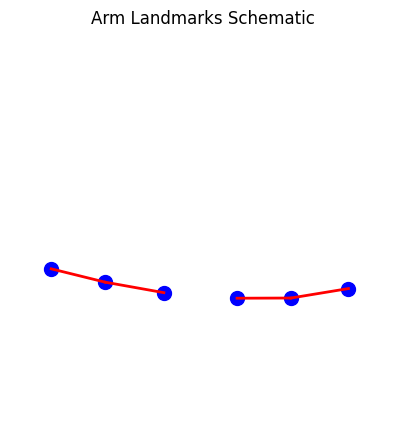

[ 0.58942181  0.67369545 -0.18021563  0.40867773  0.72123545 -0.18988396
  0.7222833   0.67234105 -0.19489194  0.38649234  0.9019435  -0.37499851
  0.88453448  0.64725012 -0.29206315  0.47199845  0.9170844  -0.69829905]
15
left


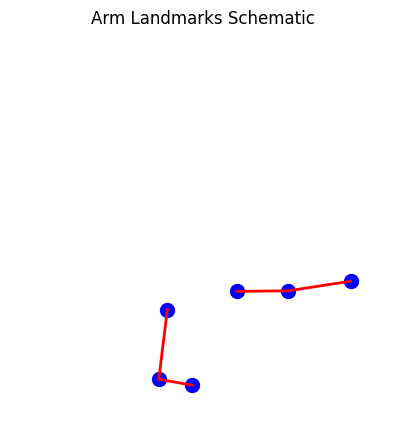

[ 0.5850603   0.67261827 -0.12384385  0.41012511  0.71382207 -0.14957038
  0.7169739   0.65612566 -0.14835629  0.41751853  0.84852248 -0.3051222
  0.85969746  0.61097264 -0.23476517  0.49305707  0.84162313 -0.55529797]
15
left


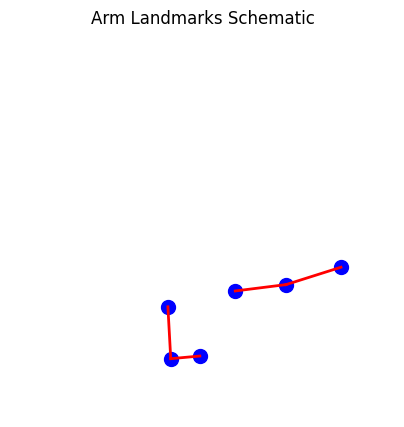

[ 0.5780226   0.72319436 -0.15925375  0.39941448  0.68325621 -0.14557225
  0.59565526  0.92005366 -0.20753327  0.25573537  0.63333672 -0.18177888
  0.5729394   1.01675498 -0.43384999  0.12393667  0.56324184 -0.3244091 ]
15
right


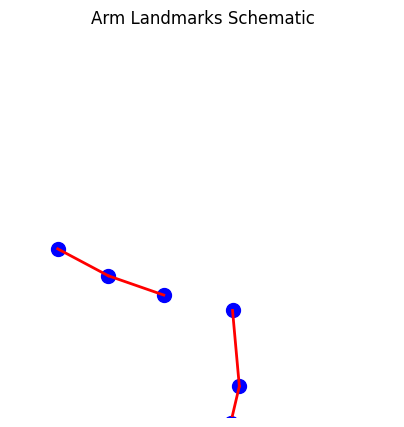

[ 0.57991451  0.72564298 -0.16767055  0.40362114  0.6841771  -0.21791831
  0.59958678  0.92483109 -0.22090955  0.25942871  0.65151954 -0.23600793
  0.58178276  1.0196985  -0.50648773  0.11221838  0.59504491 -0.34404957]
15
right


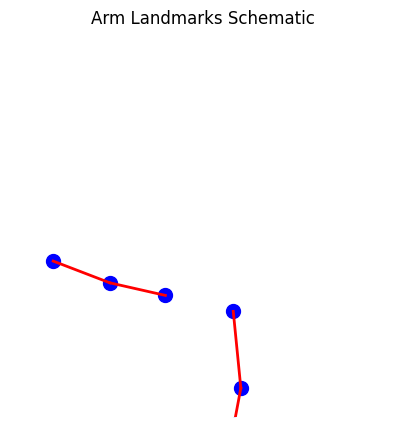

[ 0.57852852  0.70017564 -0.09835244  0.40373024  0.70704103 -0.21388745
  0.69218314  0.68892443 -0.07292752  0.36645249  0.89256698 -0.40705529
  0.83676207  0.64655989 -0.14452493  0.44566965  0.85959446 -0.70879692]
15
left


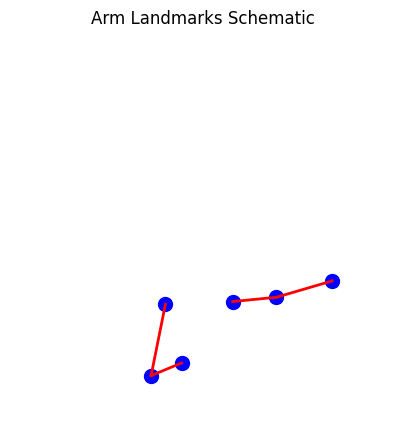

[ 0.6032216   0.61132789 -0.20369835  0.43410891  0.584925   -0.19276716
  0.64267671  0.79337144 -0.12315866  0.34888023  0.63015592 -0.46752277
  0.64198649  0.97877419 -0.21841431  0.26062238  0.62388635 -1.07990718]
16
right


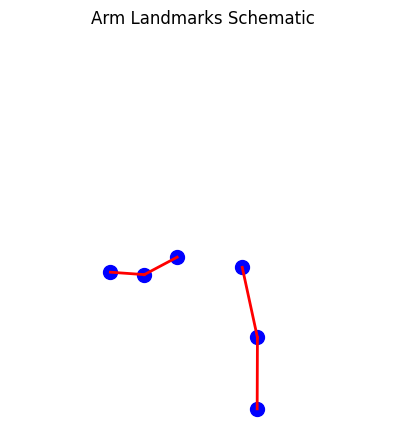

[ 0.59448397  0.62354308 -0.2271971   0.43373078  0.62647814 -0.18391351
  0.64660299  0.60437465 -0.69210744  0.35814893  0.57417363 -0.5976941
  0.66647518  0.45851818 -1.16620827  0.32057646  0.42971906 -1.0628159 ]
16
stop


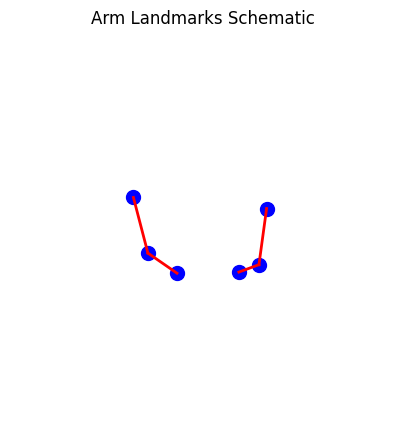

[ 0.60486877  0.65947539 -0.270354    0.44169861  0.61535698 -0.20508239
  0.64488149  0.84806931 -0.23983173  0.34660459  0.55278903 -0.29739201
  0.65862095  1.0241977  -0.38972199  0.28428465  0.43440211 -0.59728366]
16
right


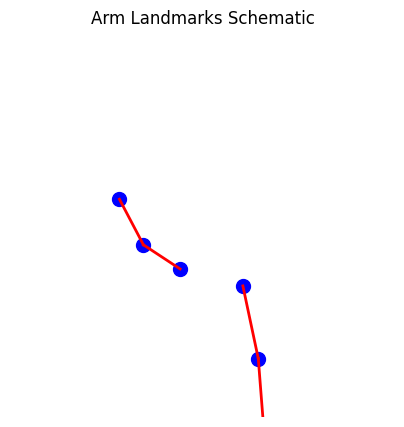

[ 0.60376608  0.67674619 -0.25881144  0.42192999  0.70350575 -0.40491271
  0.73280036  0.68086702 -0.15656541  0.38099954  0.86642903 -0.37297988
  0.8747285   0.64838535 -0.23802075  0.365044    1.02759087 -0.46733275]
16
left


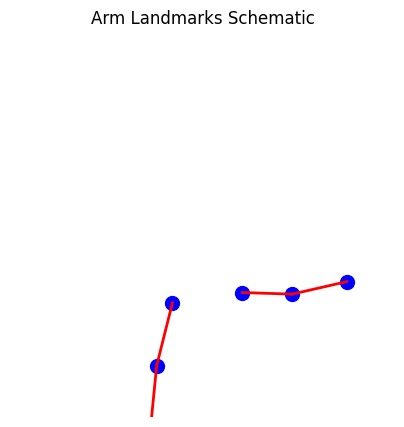

[ 0.60365778  0.65578854 -0.27718851  0.43398386  0.61283678 -0.21737096
  0.63781583  0.84232259 -0.25471148  0.31584013  0.6058054  -0.34201771
  0.6379537   1.01548016 -0.40718713  0.22051688  0.56899542 -0.74791831]
16
right


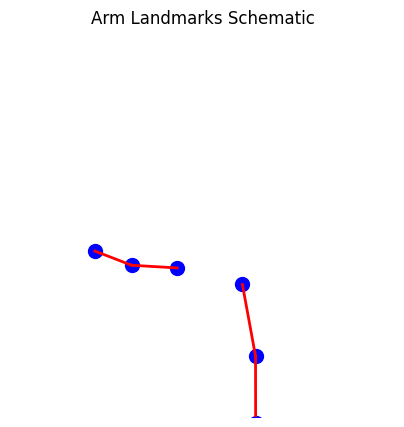

[ 0.5991714   0.63099641 -0.25589782  0.4176155   0.66075498 -0.37352464
  0.7234717   0.63655752 -0.14841211  0.37547064  0.83450735 -0.37943402
  0.85592824  0.612077   -0.2092205   0.36582696  0.99813157 -0.53485787]
16
left


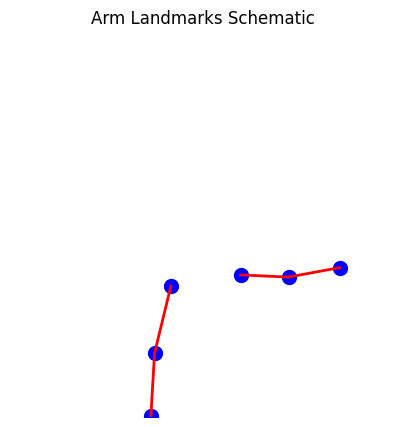

[ 0.59529054  0.61856681 -0.38957536  0.41274279  0.66214865 -0.53440362
  0.71843106  0.62565619 -0.25894481  0.37468731  0.83643574 -0.51322722
  0.85405362  0.61213517 -0.30140907  0.36787334  0.99705082 -0.65050405]
16
left


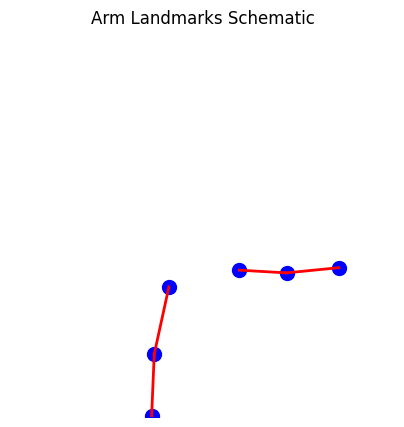

[ 0.60800433  0.63539141 -0.223208    0.41983858  0.67315072 -0.34320733
  0.73332971  0.64780992 -0.16644339  0.39526957  0.87279874 -0.40843564
  0.85688818  0.60471404 -0.2538974   0.40321952  1.01745999 -0.6212278 ]
17
left


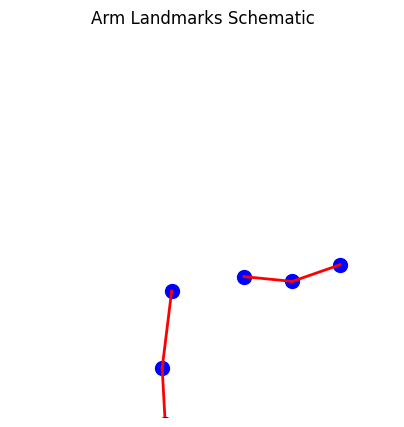

[ 0.60924518  0.63545239 -0.30779102  0.42708173  0.64378476 -0.23726866
  0.73302495  0.61009187 -0.33011541  0.33171561  0.59752786 -0.25752854
  0.85103047  0.56776577 -0.42890024  0.21143682  0.52358699 -0.52956927]
17
stop


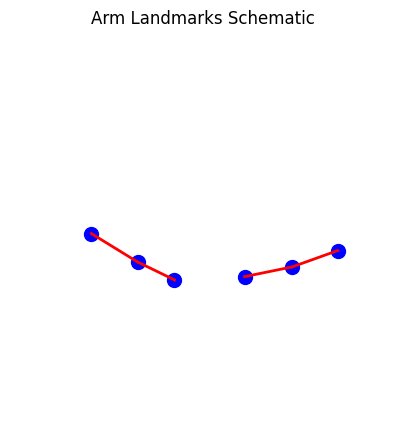

[ 0.60294747  0.63544637 -0.30158776  0.42696935  0.67544574 -0.41525808
  0.72695196  0.6242277  -0.20378606  0.37020496  0.82346624 -0.41063643
  0.84119022  0.59254777 -0.24978586  0.29251793  1.03532708 -0.52573168]
17
left


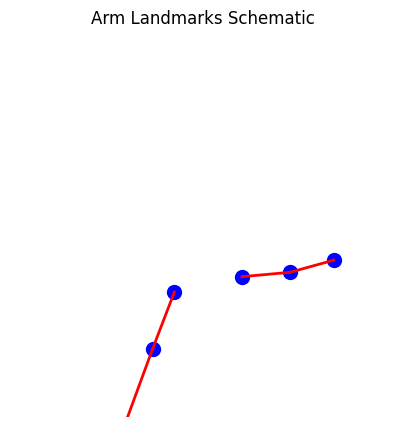

[ 0.60340059  0.67157477 -0.28753847  0.43039232  0.64905322 -0.170239
  0.62653065  0.85048485 -0.34514701  0.31914645  0.63514388 -0.08215096
  0.61012399  1.00178182 -0.6589731   0.18563578  0.59549087 -0.24507618]
17
stop


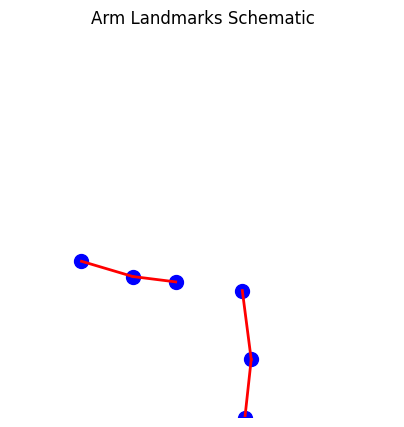

[ 0.61699706  0.73638463 -0.21022661  0.45092073  0.65462393 -0.17739746
  0.60775292  0.91548443 -0.23634014  0.3444466   0.6269787  -0.29289004
  0.57746816  1.03988349 -0.49606785  0.23273948  0.58999676 -0.72129786]
17
right


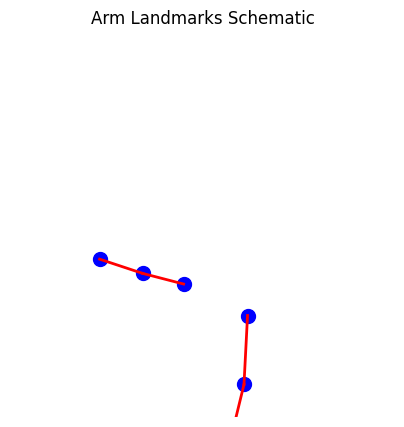

[ 0.61145765  0.67259151 -0.33019575  0.43387833  0.65697849 -0.24559203
  0.71630985  0.67812335 -0.30185407  0.32457808  0.62414253 -0.42100972
  0.84689504  0.6541214  -0.49865693  0.19597515  0.58073866 -0.84771746]
17
stop


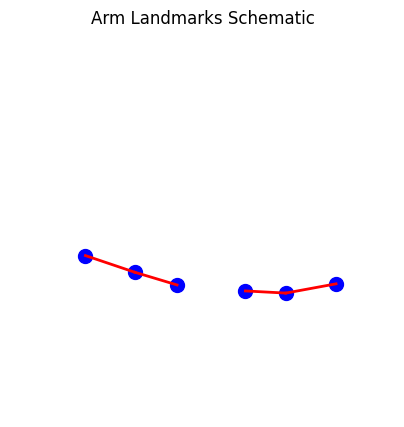

[ 0.60156709  0.70115799 -0.10069238  0.43212205  0.64469558 -0.05907829
  0.64183646  0.85601175 -0.17724828  0.34322509  0.57630461 -0.24754357
  0.60786432  0.9864887  -0.46642584  0.25367427  0.45396805 -0.64811391]
17
right


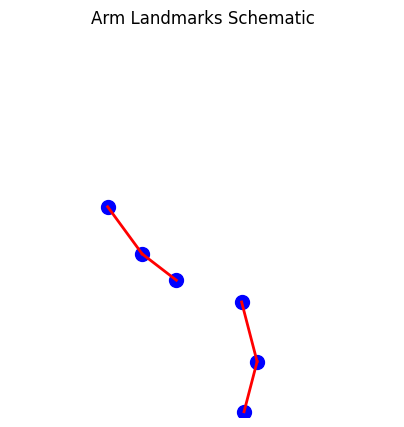

[ 0.60402262  0.64432251 -0.32913315  0.42588854  0.68300247 -0.43108004
  0.71461254  0.6149537  -0.31230322  0.39777824  0.86344081 -0.52962035
  0.84245861  0.55371195 -0.46374759  0.43365699  1.01381028 -0.79090154]
17
left


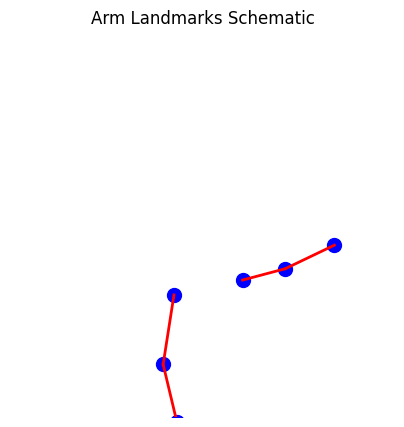

[ 0.6218394   0.73197669 -0.09176417  0.45230478  0.65723765 -0.0054203
  0.61276639  0.89594609 -0.21912205  0.37602228  0.5875808  -0.27484116
  0.56362057  0.99925768 -0.46975249  0.28043103  0.48370168 -0.75156605]
17
right


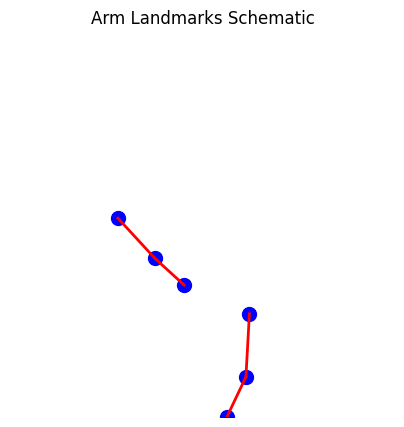

[ 0.53240544  0.7253319  -0.20660286  0.3575772   0.73202646 -0.37666866
  0.64554876  0.79384744 -0.13299966  0.33558318  0.90911865 -0.41139835
  0.75231171  0.72328836 -0.22726993  0.39274302  0.99835175 -0.53290814]
18
left


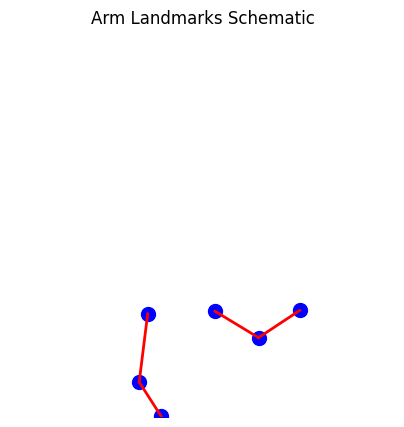

[ 0.57004052  0.73760444 -0.20490125  0.38646114  0.67767066 -0.1761011
  0.57033199  0.92652065 -0.20069873  0.25838932  0.74655759 -0.26262075
  0.51237142  1.03518474 -0.44506016  0.15372188  0.65618837 -0.66662449]
18
right


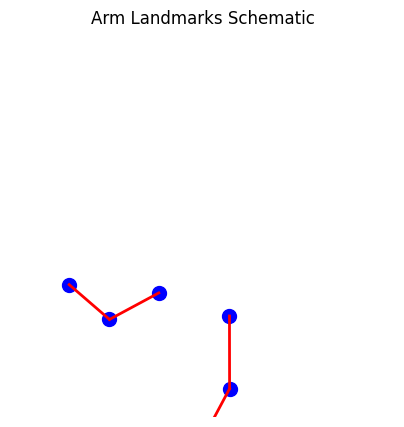

[ 0.56320232  0.6951316  -0.16548583  0.38030419  0.67853856 -0.1121444
  0.67268586  0.70038897 -0.24578252  0.25313401  0.70132929 -0.16380408
  0.67326015  0.52294093 -0.43739396  0.22838481  0.52671134 -0.34493411]
18
stop


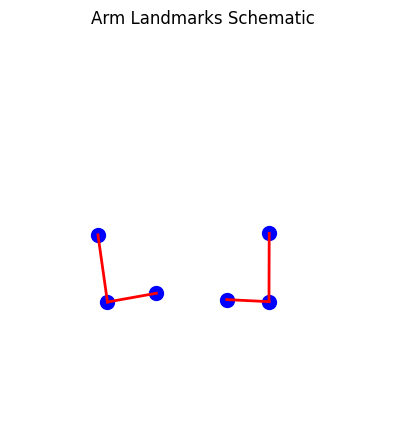

[ 0.54446423  0.70338255 -0.09508698  0.36355543  0.72509521 -0.26310197
  0.66784209  0.74762905 -0.10671522  0.33465815  0.91988575 -0.23247345
  0.76525378  0.61790979 -0.31019872  0.40055361  1.03750575 -0.31979364]
18
left


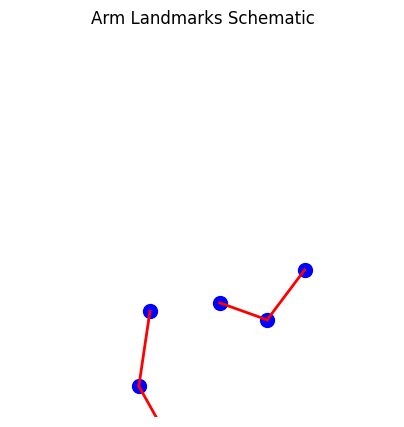

[ 0.55356532  0.73499906 -0.100017    0.37909549  0.7076413  -0.0712802
  0.57425785  0.91705608 -0.15098463  0.26744655  0.72842258 -0.19526121
  0.54885209  1.04102993 -0.34937841  0.2017446   0.57720631 -0.48867506]
18
right


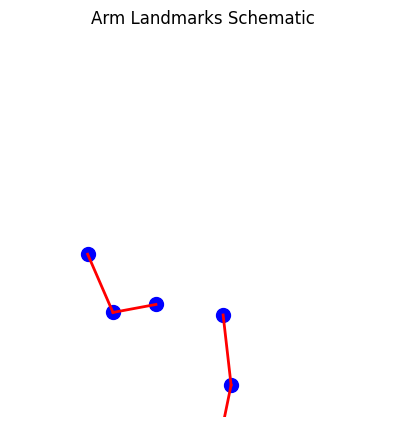

[ 0.54545742  0.70089078 -0.10789059  0.37024814  0.72824162 -0.26495525
  0.6726647   0.71128929 -0.11395329  0.33751863  0.91314578 -0.2254546
  0.76496887  0.58164245 -0.2967917   0.37943247  1.03617942 -0.31454134]
18
left


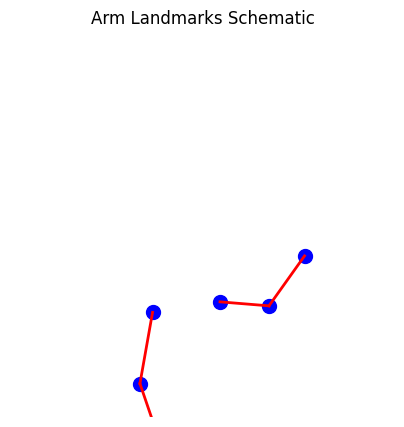

[ 5.42208195e-01  7.11602569e-01 -2.16923610e-04  3.65765363e-01
  7.32721686e-01 -1.98098779e-01  6.66215003e-01  7.58228898e-01
 -3.12080383e-02  3.42721850e-01  9.21870232e-01 -2.39401892e-01
  7.65785873e-01  6.46002412e-01 -2.76444882e-01  4.04750645e-01
  1.03323746e+00 -3.52835745e-01]
18
left


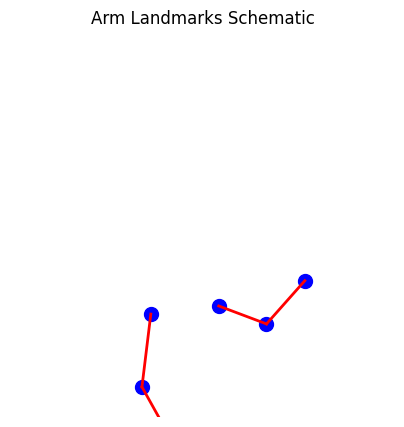

[ 0.58749712  0.59171718 -0.11109275  0.41737786  0.63228357 -0.12760814
  0.699498    0.67663354 -0.03333068  0.38675296  0.77710205 -0.21683104
  0.80761385  0.72752964 -0.19978781  0.40610403  0.86098349 -0.52253932]
19
left


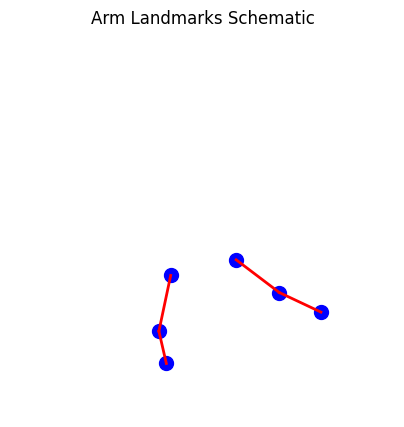

[ 0.61434823  0.60301852 -0.52241188  0.42538422  0.60537493 -0.49576092
  0.73458117  0.64432198 -0.59021956  0.30521327  0.62907952 -0.55964857
  0.86456263  0.6499598  -0.76943076  0.18139687  0.58138055 -0.73572069]
19
stop


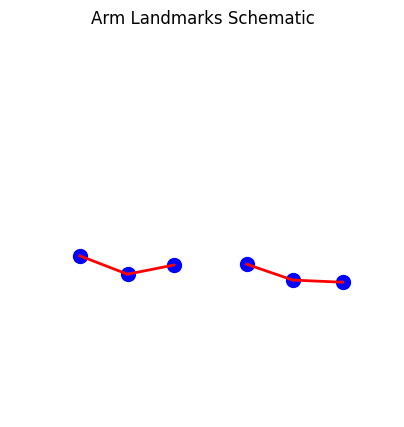

[ 0.61767584  0.64350015 -0.31712297  0.4489994   0.59133565 -0.18204251
  0.64426535  0.79405385 -0.40874177  0.33534136  0.56987298 -0.15120284
  0.61282736  0.8868264  -0.64195144  0.22088161  0.5270561  -0.24708965]
19
stop


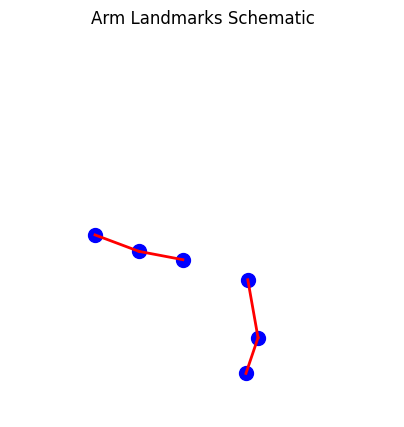

[ 0.63679731  0.68791258 -0.5135237   0.47516847  0.58776307 -0.45886692
  0.6116634   0.86673868 -0.5140574   0.33710912  0.54578859 -0.46713695
  0.56470072  0.98862684 -0.61842775  0.21311216  0.47483051 -0.53132451]
19
right


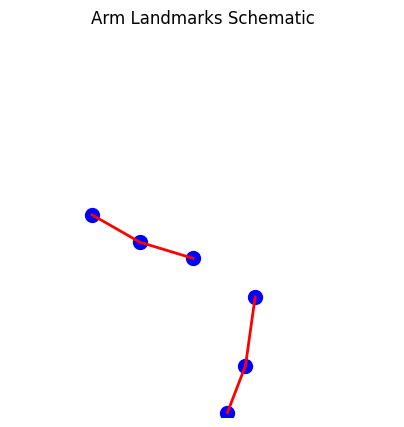

[ 0.6230309   0.59571159 -0.417456    0.44226235  0.58278382 -0.39355713
  0.72949874  0.57489985 -0.49464083  0.31188864  0.55930507 -0.46572527
  0.8478651   0.48940712 -0.61663723  0.19410619  0.47126663 -0.62198073]
19
stop


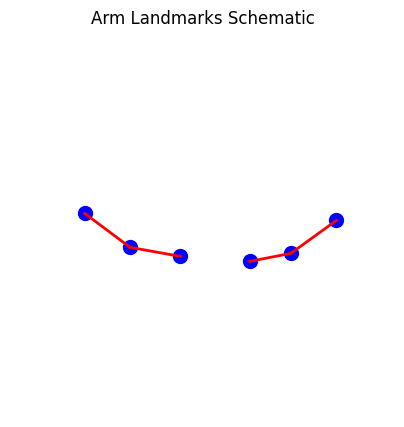

[ 0.56370962  0.52890998 -0.94510949  0.27169356  0.69990659 -1.16633248
  0.77124691  0.45633271 -0.80917138  0.29738766  0.97109526 -1.19703066
  0.97888231  0.40783694 -0.87886494  0.46025625  1.14068794 -1.30167544]
19
left


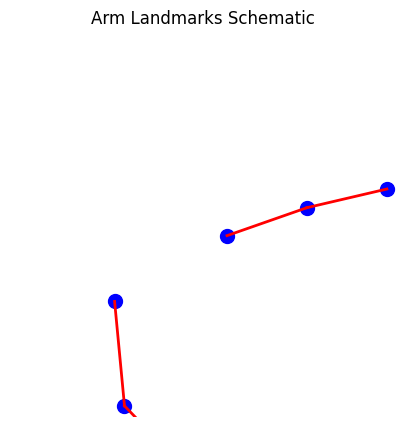

[ 0.60225874  0.57795507 -0.87126368  0.35248297  0.69607824 -0.99403638
  0.74503928  0.49485782 -0.72299689  0.33090931  0.95451164 -1.01989245
  0.93302107  0.41980702 -0.68241608  0.31461084  1.20448232 -1.18256879]
19
left


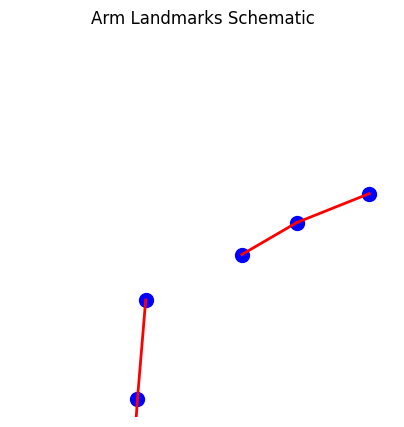

[ 0.6191746   0.70091635 -0.12949614  0.3948212   0.63098848 -0.15051727
  0.64590633  0.92724901 -0.18526265  0.24961014  0.55523169 -0.16787145
  0.6251291   1.05637658 -0.52057642  0.1124846   0.41711748 -0.38275665]
19
right


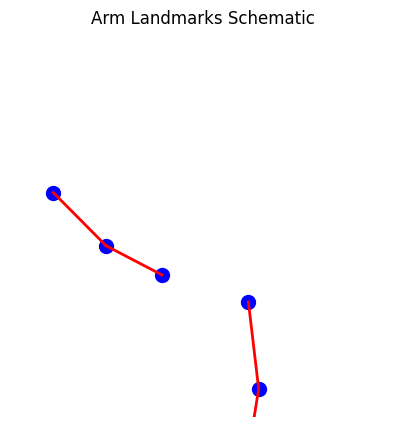

[ 0.61612207  0.68734866 -0.14425145  0.39053541  0.67645836 -0.22866055
  0.67752916  0.92027974  0.01885227  0.347646    0.92694014 -0.21605523
  0.74327499  1.09252238 -0.11464058  0.35784811  1.09268308 -0.494721  ]
19
left


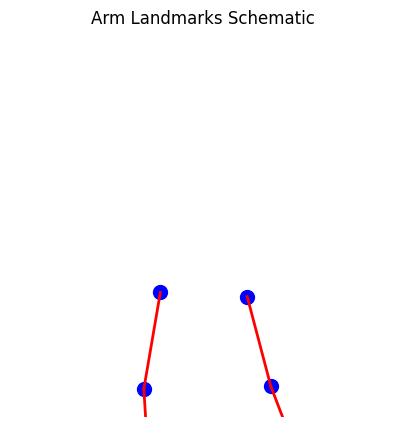

[ 0.67629969  0.7560842  -0.01974926  0.47856313  0.61651695 -0.20343292
  0.67039859  0.94997162 -0.0132858   0.32803032  0.50344807 -0.34590751
  0.68739378  1.09821069 -0.26957479  0.17215528  0.35838524 -0.48842588]
19
right


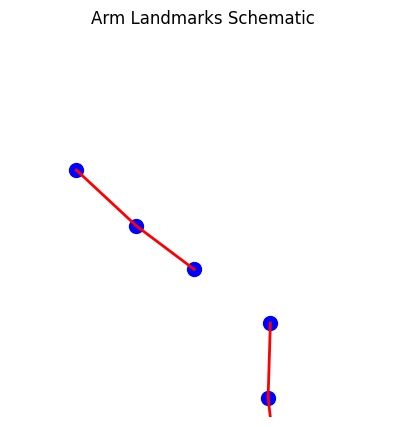

[ 0.63054144  0.65925413 -0.2207396   0.43598849  0.70361143 -0.34025794
  0.76442957  0.79031247 -0.06623378  0.41056961  0.92696214 -0.33200905
  0.91555053  0.82588673 -0.17102101  0.42786461  1.11516619 -0.52015132]
20
left


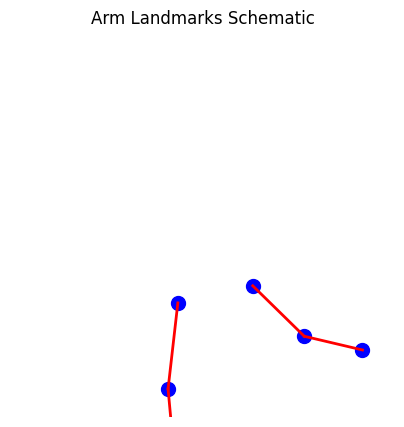

[ 0.64863688  0.6999014  -0.30813724  0.44410539  0.69526511 -0.16647246
  0.66464865  0.92384648 -0.28252673  0.38192502  0.8997013  -0.08842206
  0.63394099  1.12086761 -0.49197096  0.31305128  1.03368819 -0.35042268]
20
stop


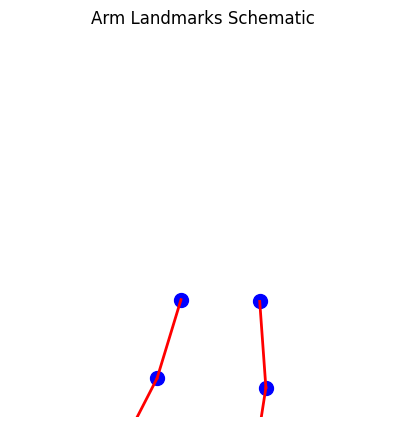

[ 0.64847744  0.70502502 -0.27890617  0.4404119   0.70108229 -0.15899512
  0.67158741  0.93004531 -0.23855487  0.38502419  0.90441078 -0.08806211
  0.64372981  1.12632191 -0.42872915  0.39702383  1.04386008 -0.35776052]
20
stop


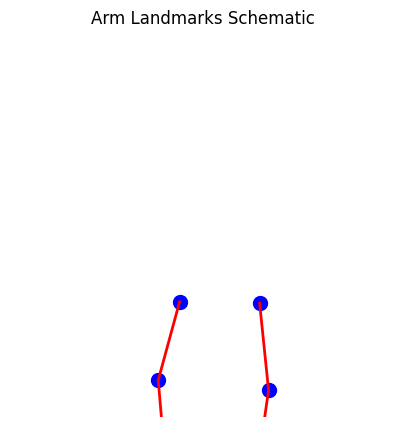

[ 0.63833642  0.65678281 -0.15706316  0.43775076  0.68906856 -0.06281736
  0.73171145  0.6130811  -0.25564325  0.37838107  0.89680606  0.03487309
  0.79884982  0.41539487 -0.5360769   0.35725021  1.05330014 -0.11702847]
20
stop


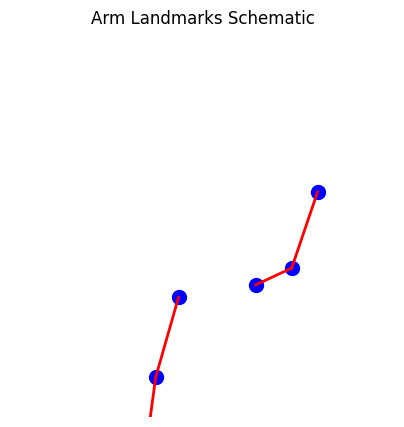

[ 0.63870221  0.66273779 -0.27874058  0.40431657  0.7181192  -0.15522534
  0.76873362  0.59769285 -0.39712495  0.35530794  0.96528035 -0.05868264
  0.86762351  0.35635814 -0.52597106  0.34169203  1.17764664 -0.14627881]
20
stop


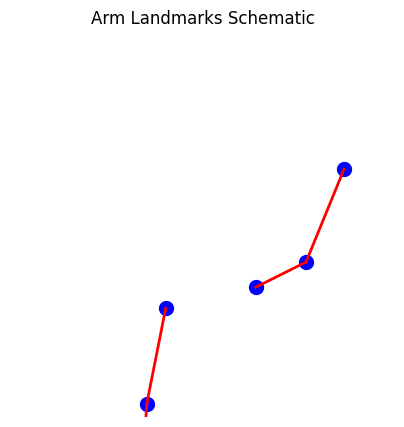

[ 0.66767985  0.71679777 -0.42621908  0.41935009  0.69221091 -0.26422143
  0.74641699  0.94983751 -0.46895057  0.27730876  0.69065368 -0.27990085
  0.80446643  1.20221674 -0.65373588  0.09605009  0.61787665 -0.45121565]
20
stop


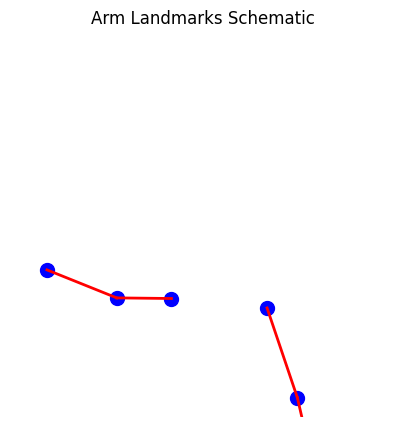

[ 0.67040902  0.72536844 -0.44565687  0.42122141  0.69540924 -0.27443823
  0.74060571  0.95969033 -0.47988957  0.25659126  0.72613728 -0.25870997
  0.77758396  1.22955644 -0.66939533  0.06111246  0.67652929 -0.44151711]
20
stop


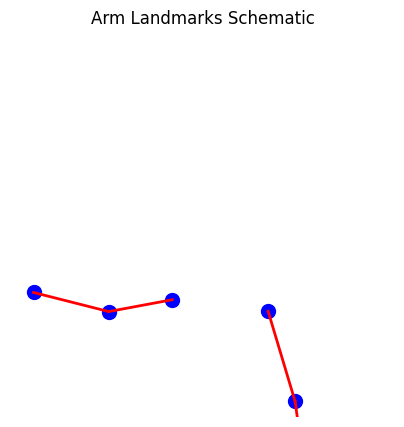

[ 0.6696505   0.75347513 -0.42893648  0.42326775  0.71482694 -0.30099013
  0.7346077   0.96914947 -0.44434476  0.24910724  0.73528016 -0.28424966
  0.76138055  1.26120901 -0.68469417  0.05503746  0.6583783  -0.49834722]
20
stop


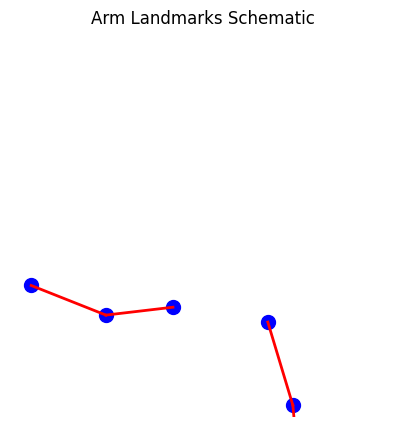

[ 0.66810215  0.7533626  -0.1185898   0.42791501  0.71348822 -0.23041213
  0.72911251  0.96811634 -0.12417455  0.35017762  0.70847315 -0.76557523
  0.75568426  1.26915157 -0.20203522  0.29504114  0.54547036 -1.53070045]
20
right


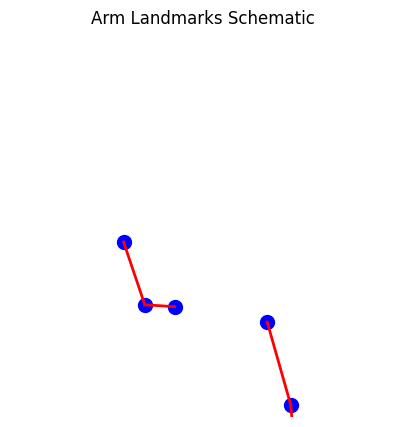

[ 0.6415782   0.74796748 -0.19945878  0.41625023  0.7442711  -0.0747953
  0.68361336  0.76694781 -0.63695347  0.34695095  0.95659983  0.03776348
  0.69844699  0.61544728 -1.20021749  0.30761561  1.19803631 -0.04056766]
20
stop


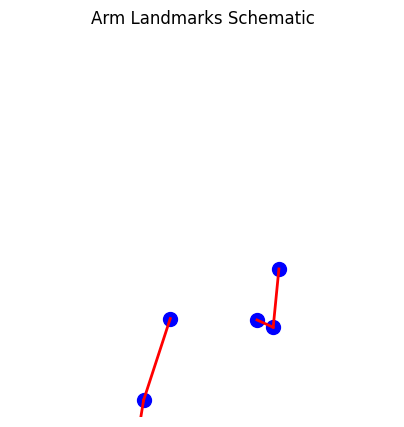

[ 0.66004002  0.77110672 -0.2047911   0.41991672  0.76676494 -0.21461387
  0.71425223  1.01019061 -0.19110587  0.30333114  0.64665508 -0.51240724
  0.72627032  1.2935127  -0.316497    0.23533025  0.39418724 -1.00368035]
20
right


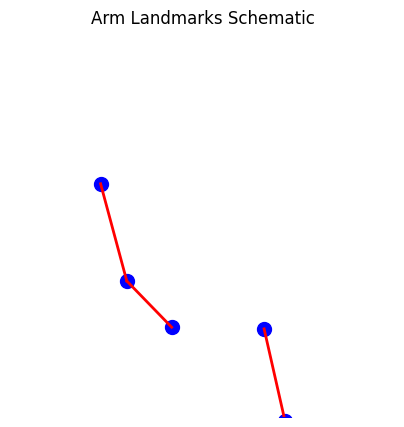

[ 0.65997821  0.78351808 -0.09565635  0.42660928  0.77226537 -0.196502
  0.71581739  1.00258696 -0.07296938  0.34240687  0.72476584 -0.68043506
  0.72647566  1.31065869 -0.19140045  0.30361456  0.54602605 -1.41722727]
20
right


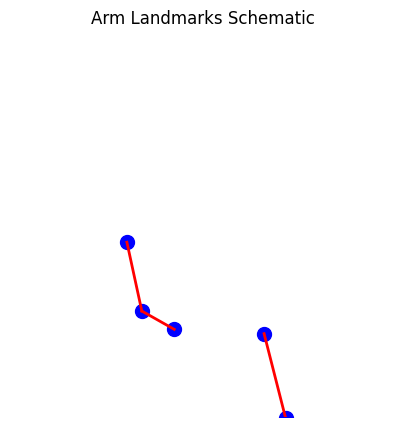

[ 0.65930718  0.78650123 -0.11855599  0.42666602  0.76852727 -0.11677399
  0.71412903  1.01288664 -0.11375872  0.34701806  0.67039478 -0.50435239
  0.71692812  1.30078781 -0.24528208  0.30019855  0.4214502  -1.01998019]
20
right


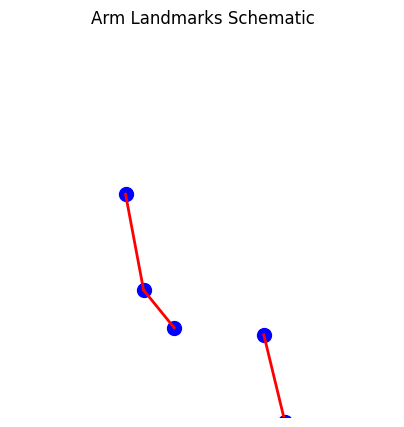

In [31]:
# Plot the first few samples
for i in range(len(df)):
  row = df.iloc[i]
  print(row['arm_landmarks'])
  print(row['participant_id'])
  print(row['gesture'])
  plot_landmarks(row['arm_landmarks'])